In [1]:
import scanpy as sc
import pandas as pd
from pathlib import Path
import anndata as ad
import numpy as np
import os
import scvi

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

DPI = 300
FONTSIZE = 20  # 42

sc.settings.set_figure_params(
    scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
)
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

Global seed set to 0


In [2]:
DIR2SAVE = Path(
    "/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/subpopulations/Myeloid/final/"
)
DIR2SAVE.mkdir(parents=True, exist_ok=True)
FIG2SAVE = DIR2SAVE.joinpath("figures/forpaper/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)
# set the global variable: sc.settings.figdir to save all plots
sc.settings.figdir = FIG2SAVE

In [3]:
adata = sc.read_h5ad(
    DIR2SAVE.joinpath("CRC_LM_decon_scvi_hvg_Myeloid_DC_clustering_final.h5ad")
)
adata.shape

(17232, 2000)

In [4]:
adata.obs.Annotation_scVI_detailed.cat.categories

Index(['C1QC Mac', 'FCN1 Mono', 'HSP Mono', 'IL1B Mac', 'Kupffer',
       'Myeloid cycling', 'NLRP3 Mac', 'Neutrophil', 'PLTP LYVE1 Mac',
       'SPP1 Mac', 'cDC1', 'cDC2', 'migDC', 'pDC'],
      dtype='object')

In [5]:
adata.uns["Annotation_scVI_detailed_colors"]

array(['#80b1d3', '#b3de69', '#e31a1c', '#fb8072', '#e78ac3', '#ffff99',
       '#fdb462', '#1f78b4', '#fccde5', '#8dd3c7', '#bc80bd', '#bebada',
       '#762a83', '#fa9fb5'], dtype=object)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
sc.pl.umap(
    adata,
    color="Annotation_scVI_detailed",
    show=False,
    legend_loc="right margin",
    title="Myeloid mCRC",
    ax=ax,
)
ax.set_xlabel("")
ax.set_ylabel("")
fig.savefig(FIG2SAVE.joinpath("Annotation.pdf"), bbox_inches='tight', dpi=DPI)

In [12]:
markers_myeloid_general = {
    "Macrophage": ["FCER1G", "CD163", "APOC1", "C1QC", "APOE"],
    "Monocyte": ["S100A8", "S100A9", "VCAN", "FCN1"],
    "DC": ["FCER1A", "PKIB", "CD1C", "PCLAF", "CLEC10A"],
    "Neutrophil": ["FCGR3B", "S100A8", "S100A12"],
    "Cycling": ["MKI67"],
}

markers_macrophage = {
    "C1QC": ["C1QC", "FPR3", "TREM2", "MS4A4A", "SLAMF8", "FCGR1A"],
    "NLRP3/IL1B": ["NLRP3", "EREG", "IL1B", "CCL3"],
    "PLTP LYVE1": ["PLTP", "LYVE1"],
    "SPP1": ["SPP1", "MARCO", "FN1", "SLC11A1", "PPARG"],
    "Kupffer": ["CETP", "CD5L", "TIMD4"],
}

markers_monocyte = {
    "Monocyte": ["S100A8", "S100A9", "VCAN", "FCN1"],
    "CD14": ["CD14"],
    "CD16": ["FCGR3A"],
    "FCN1": ["FCN1"],
    "HSP": ["HSPB1"]
}

DC_markers = {
    #"DC": ["FCER1A", "PKIB", "CD1C", "PCLAF", "CLEC10A"],
    "cDC1": ["CLEC9A", "XCR1", "BATF3", "RAB7B", "CADM1"],
    "cDC2": ["CD1C", "FCER1A", "CLEC10A",], # "MSLN", "JAML"
    #"DC3": ["CLEC10A", "S100A8", "CD36", "CD163"],
    "migDC": ["LAMP3", "CCR7"],
    "pDC": ["LILRA4", "JCHAIN", "IL3RA", "SPIB", "MZB1", "IRF7"],
}

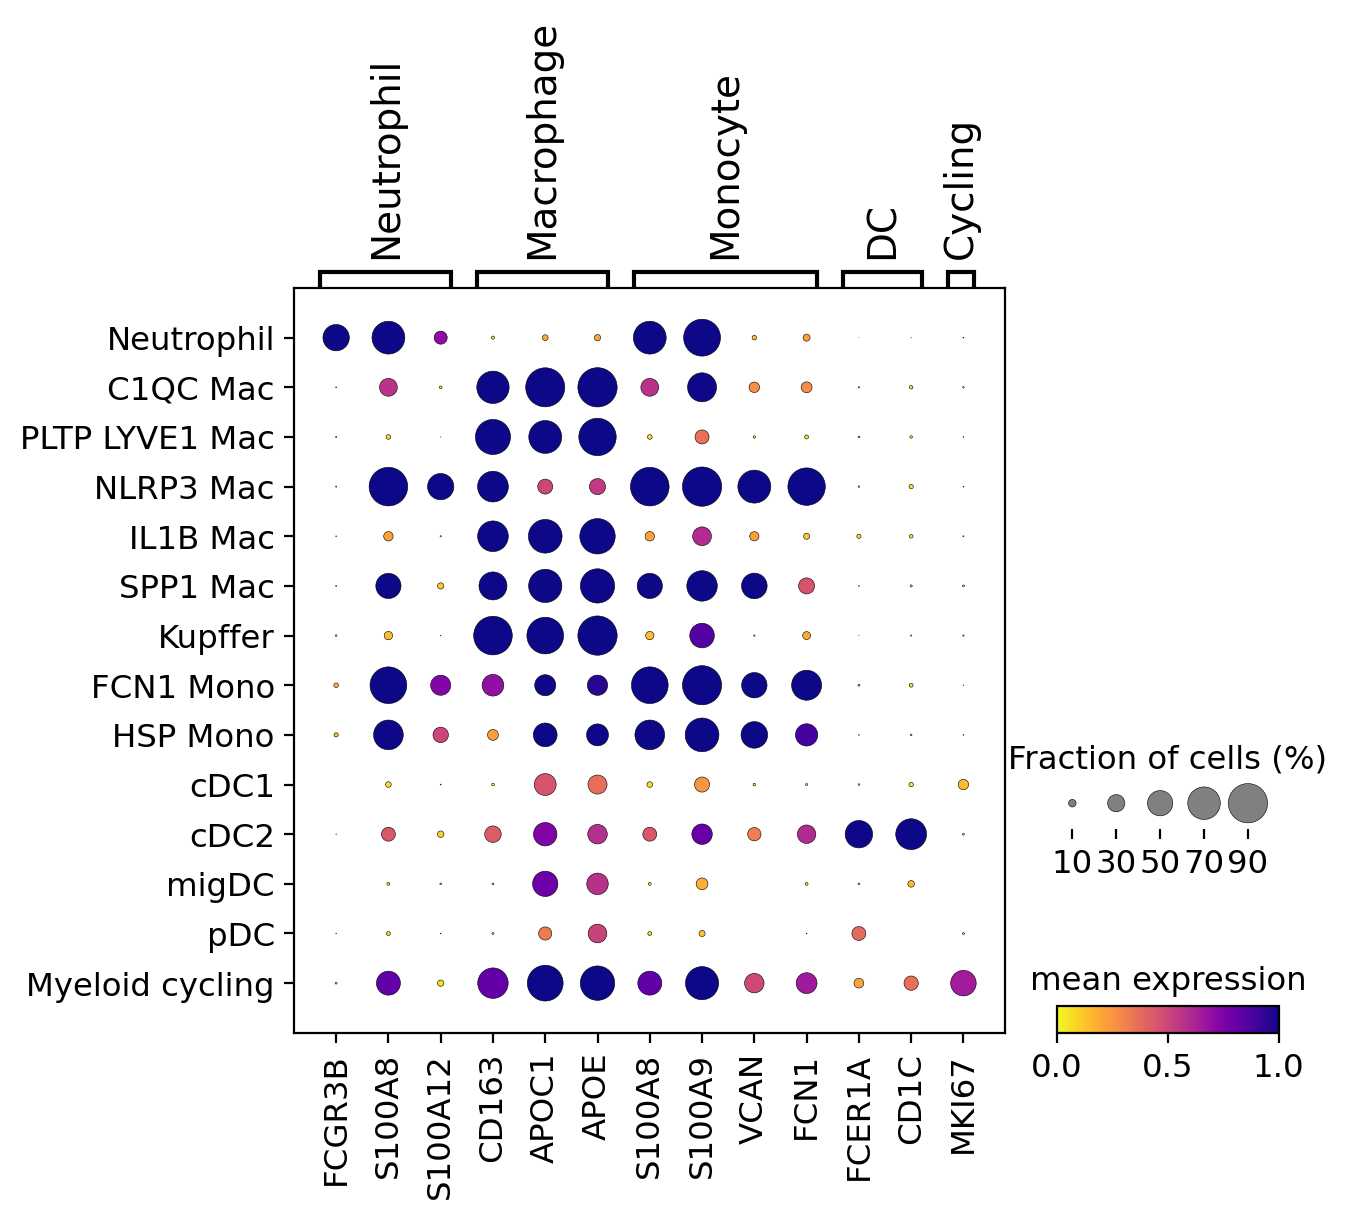

In [38]:
marker_general_only_dict = {
    "Neutrophil": ["FCGR3B", "S100A8", "S100A12"],
    "Macrophage": ["CD163", "APOC1", "APOE"],
    "Monocyte": ["S100A8", "S100A9", "VCAN", "FCN1"],
    "DC": ["FCER1A", "CD1C"],
    "Cycling": ["MKI67"]
}

sc.pl.dotplot(adata=adata, 
              var_names=marker_general_only_dict,
              categories_order=[
        "Neutrophil",
        "C1QC Mac",
        "PLTP LYVE1 Mac",
        "NLRP3 Mac",
        "IL1B Mac",
        "SPP1 Mac",
        "Kupffer",
        "FCN1 Mono",
        "HSP Mono",
        "cDC1",
        "cDC2",
        "migDC",
        "pDC",
        "Myeloid cycling"    
    ],
              groupby="Annotation_scVI_detailed",
              cmap="plasma_r", 
              use_raw=True,
                  vmin=0,
                vmax=1,
              dot_max=0.9, 
              colorbar_title = "mean expression", 
              size_title="Fraction of cells (%)",
              save='mean_exp_general_mac_mono_dc_only.pdf')

In [ ]:
sc.pl.dotplot(
    adata,
    groupby="Annotation_scVI_detailed",
    use_raw=True,
    var_names=markers_myeloid_general,
    categories_order=["C1QC Mac", "IL1B Mac", "NLRP3 Mac", "PLTP LYVE1 Mac", "SPP1 Mac", "Kupffer",
                      'FCN1 Mono', 'HSP Mono',
                      'cDC1', 'cDC2', 'migDC', 'pDC', 
                      'Neutrophil',
                      'Myeloid cycling'
                     ],
    cmap="plasma_r",
    standard_scale="var",
    vmin=0,
    vmax=1,
    colorbar_title="Mean expression",
    size_title = "Fraction of cells (%)",
    dendrogram=False,
    save="dotplot_mean_general.pdf",
    show=True,
)

In [ ]:
# i think we should doo a plot without macrophage and mono !

In [ ]:
sc.pl.dotplot(
    adata[adata.obs.Annotation_scVI_detailed.str.contains("Mac|Kupffer")],
    groupby="Annotation_scVI_detailed",
    use_raw=True,
    var_names=markers_macrophage,
    categories_order=["C1QC Mac", "IL1B Mac", "NLRP3 Mac", "PLTP LYVE1 Mac", "SPP1 Mac", "Kupffer"],
    cmap="plasma_r",
    standard_scale="var",
    vmin=0,
    vmax=1,
    colorbar_title="Mean expression",
    size_title = "Fraction of cells (%)",
    dendrogram=False,
    save="dotplot_mean_mac.pdf",
    show=True,
)

In [ ]:
sc.pl.dotplot(
    adata[adata.obs.Annotation_scVI_detailed.str.contains("Mono")],
    groupby="Annotation_scVI_detailed",
    use_raw=True,
    var_names=markers_monocyte,
    cmap="plasma_r",
    standard_scale="var",
    vmin=0,
    vmax=1,
    colorbar_title="Mean expression",
    size_title = "Fraction of cells (%)",
    dendrogram=False,
    save="dotplot_mean_mono.pdf",
    show=True,
)

In [ ]:
sc.pl.dotplot(
    adata[adata.obs.Annotation_scVI_detailed.str.contains("DC")],
    groupby="Annotation_scVI_detailed",
    use_raw=True,
    var_names=DC_markers,
    cmap="plasma_r",
    standard_scale="var",
    vmin=0,
    vmax=1,
    colorbar_title="Mean expression",
    size_title = "Fraction of cells (%)",
    dendrogram=False,
    save="dotplot_mean_DC.pdf",
    show=True,
)

### from paper : Macrophage diversity in cancer revisited in the era of single-cell omics
look at different macrophage gene signature to identify TAM subsets

In [ ]:
markers_tams = {
    "IFN-TAMs": ["CXCL10", "CD274", "ISG15", "CD86", "CCL2", "IFIT1", "IFIT2", "IFIT3", "IFITM1"], 
    "Inflam-TAMs": ["IL1B", "CXCL2", "CXCL3", "CXCL8", "CCL3", "CCL3L1", "CCL2", "IL1RN"],
    "Angio-TAMs": ["VEGFA", "SPP1", "VCAN", "TIMP1", "FN1", "PPARG", "FCN1", "THBS1", "AREG", "CD163"],
    "LA-TAMs": ["APOC1", "APOE", "ACP5", "FABP5", "C1QA", "C1QB", "C1QC", "TREM2", "CSTB", "SPP1"],
    #"RTM-TAMs": ["LYVE1", "HES1", "FOLR2", "CD5L", "C1QA", "C1QB", "C1QC"]
}
# Prolif-TAMs: ["CDK1", "HMGN2", "MKI67", "STMN1", "TOP2A", "TUBB"]

In [ ]:
adata_tams = adata[
    adata.obs.Annotation_scVI_detailed.str.contains("Mac|Kupffer")
].copy()

### Plot all in 1

In [67]:
markers_all = {
    "Neutrophil": ["FCGR3B", "S100A8", "S100A12"],
    "Macrophage": ["FCER1G", "CD163", "APOC1", "APOE"],
    "C1QC": ["C1QC", "FPR3", "TREM2", "MS4A4A", "SLAMF8", "FCGR1A"],
    "NLRP3/IL1B": ["NLRP3", "EREG", "IL1B", "CCL3"],
    "PLTP LYVE1": ["PLTP", "LYVE1"],
    "SPP1": ["SPP1", "MARCO", "FN1", "SLC11A1", "PPARG"],
    "Kupffer": ["CETP", "CD5L", "TIMD4"],
    "Monocyte": ["S100A8", "S100A9", "VCAN", "FCN1"],
    "CD14": ["CD14"],
    "CD16": ["FCGR3A"],
    "FCN1": ["FCN1"],
    #"DC": ["FCER1A", "PKIB", "CD1C", "PCLAF", "CLEC10A"],
    "cDC1": ["CLEC9A", "XCR1", "BATF3", "RAB7B", "CADM1"],
    "cDC2": ["CD1C", "FCER1A", "CLEC10A"],
    "migDC": ["LAMP3", "CCR7"],
    "pDC": ["LILRA4", "JCHAIN", "IL3RA", "SPIB", "MZB1", "IRF7"],
    "Cycling": ["MKI67"],
}

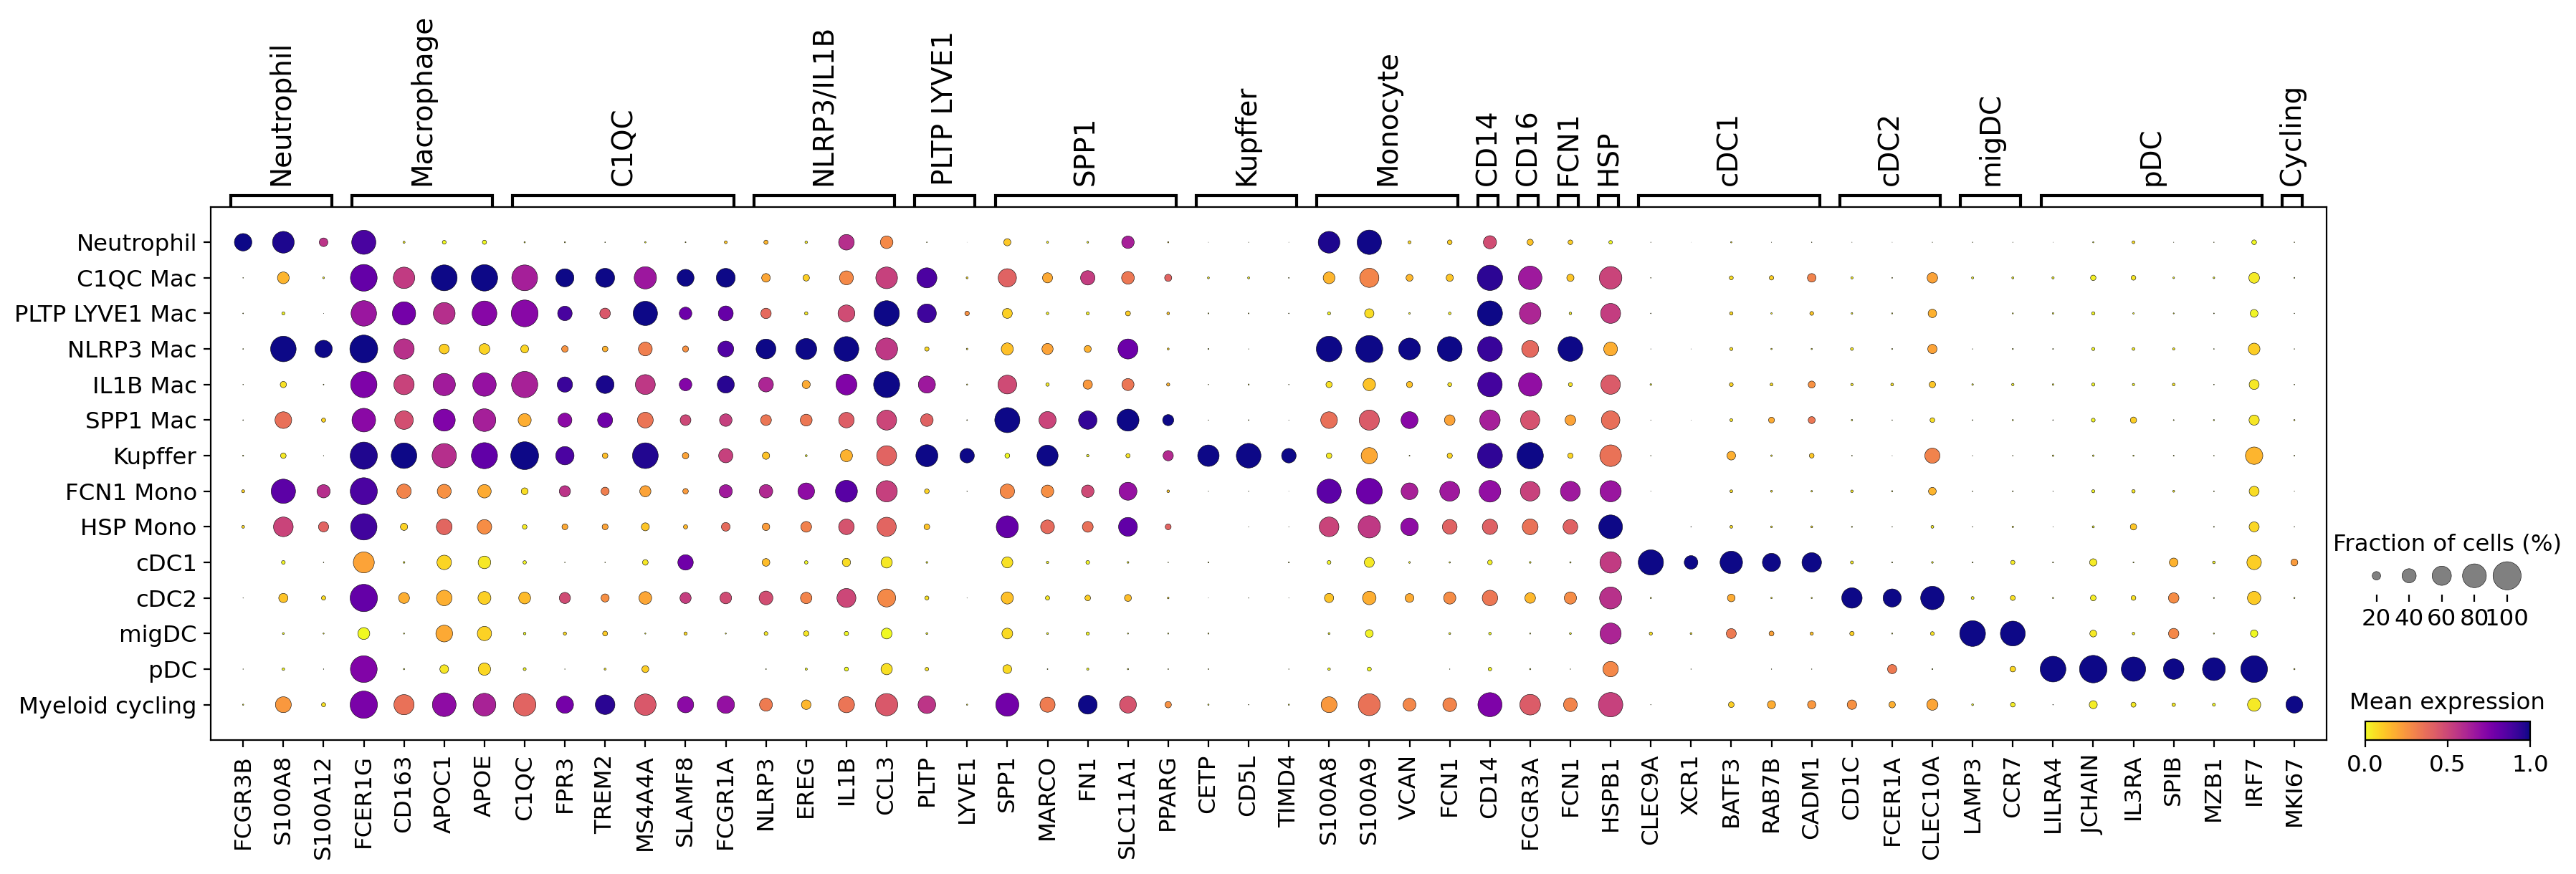

In [64]:
sc.pl.dotplot(
    adata,
    groupby="Annotation_scVI_detailed",
    categories_order=[
        "Neutrophil",
        "C1QC Mac",
        "PLTP LYVE1 Mac",
        "NLRP3 Mac",
        "IL1B Mac",
        "SPP1 Mac",
        "Kupffer",
        "FCN1 Mono",
        "HSP Mono",
        "cDC1",
        "cDC2",
        "migDC",
        "pDC",
        "Myeloid cycling"   
    ],
    use_raw=True,
    var_names=markers_all,
    cmap="plasma_r",
    standard_scale="var",
    vmin=0,
    vmax=1,
    colorbar_title="Mean expression",
    size_title="Fraction of cells (%)",
    dendrogram=False,
    save="dotplot_mean_all.pdf",
    show=True,
)

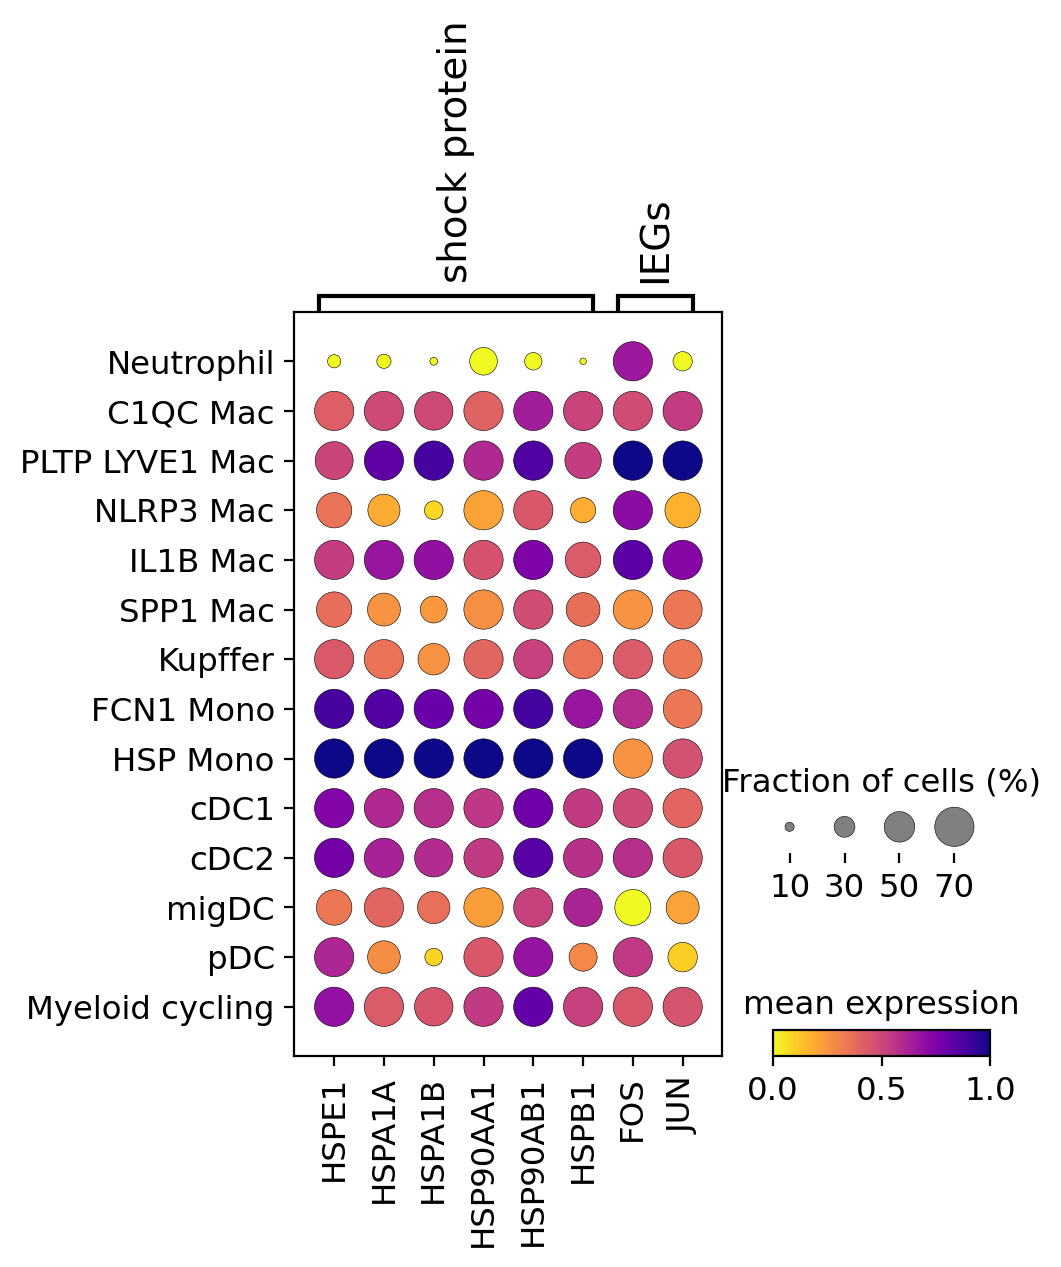

In [33]:
dissocation_markers_dict = {
    "shock protein": [
        "HSPE1",
        "HSPA1A",
        "HSPA1B",
        "HSP90AA1",
        "HSP90AB1",
        "HSPB1",
    ],
    "IEGs": ["FOS", "JUN"],
}

sc.pl.dotplot(adata=adata, 
              var_names=dissocation_markers_dict,
              categories_order=[
        "Neutrophil",
        "C1QC Mac",
        "PLTP LYVE1 Mac",
        "NLRP3 Mac",
        "IL1B Mac",
        "SPP1 Mac",
        "Kupffer",
        "FCN1 Mono",
        "HSP Mono",
        "cDC1",
        "cDC2",
        "migDC",
        "pDC",
        "Myeloid cycling"    
    ],
              groupby="Annotation_scVI_detailed",
              cmap="plasma_r", 
              use_raw=True,
              vmin=0,
              vmax=1,
              standard_scale="var",
              dot_max=0.7, 
              colorbar_title = "mean expression", 
              size_title="Fraction of cells (%)",
              save='HSP_general.pdf')

### zscore

In [6]:
adata_zscore = adata.raw.to_adata().copy()
# scale and store results in layer for later plotting
adata_zscore.layers['scaled'] = sc.pp.scale(adata_zscore, copy=True).X
adata_zscore.obs=adata.obs

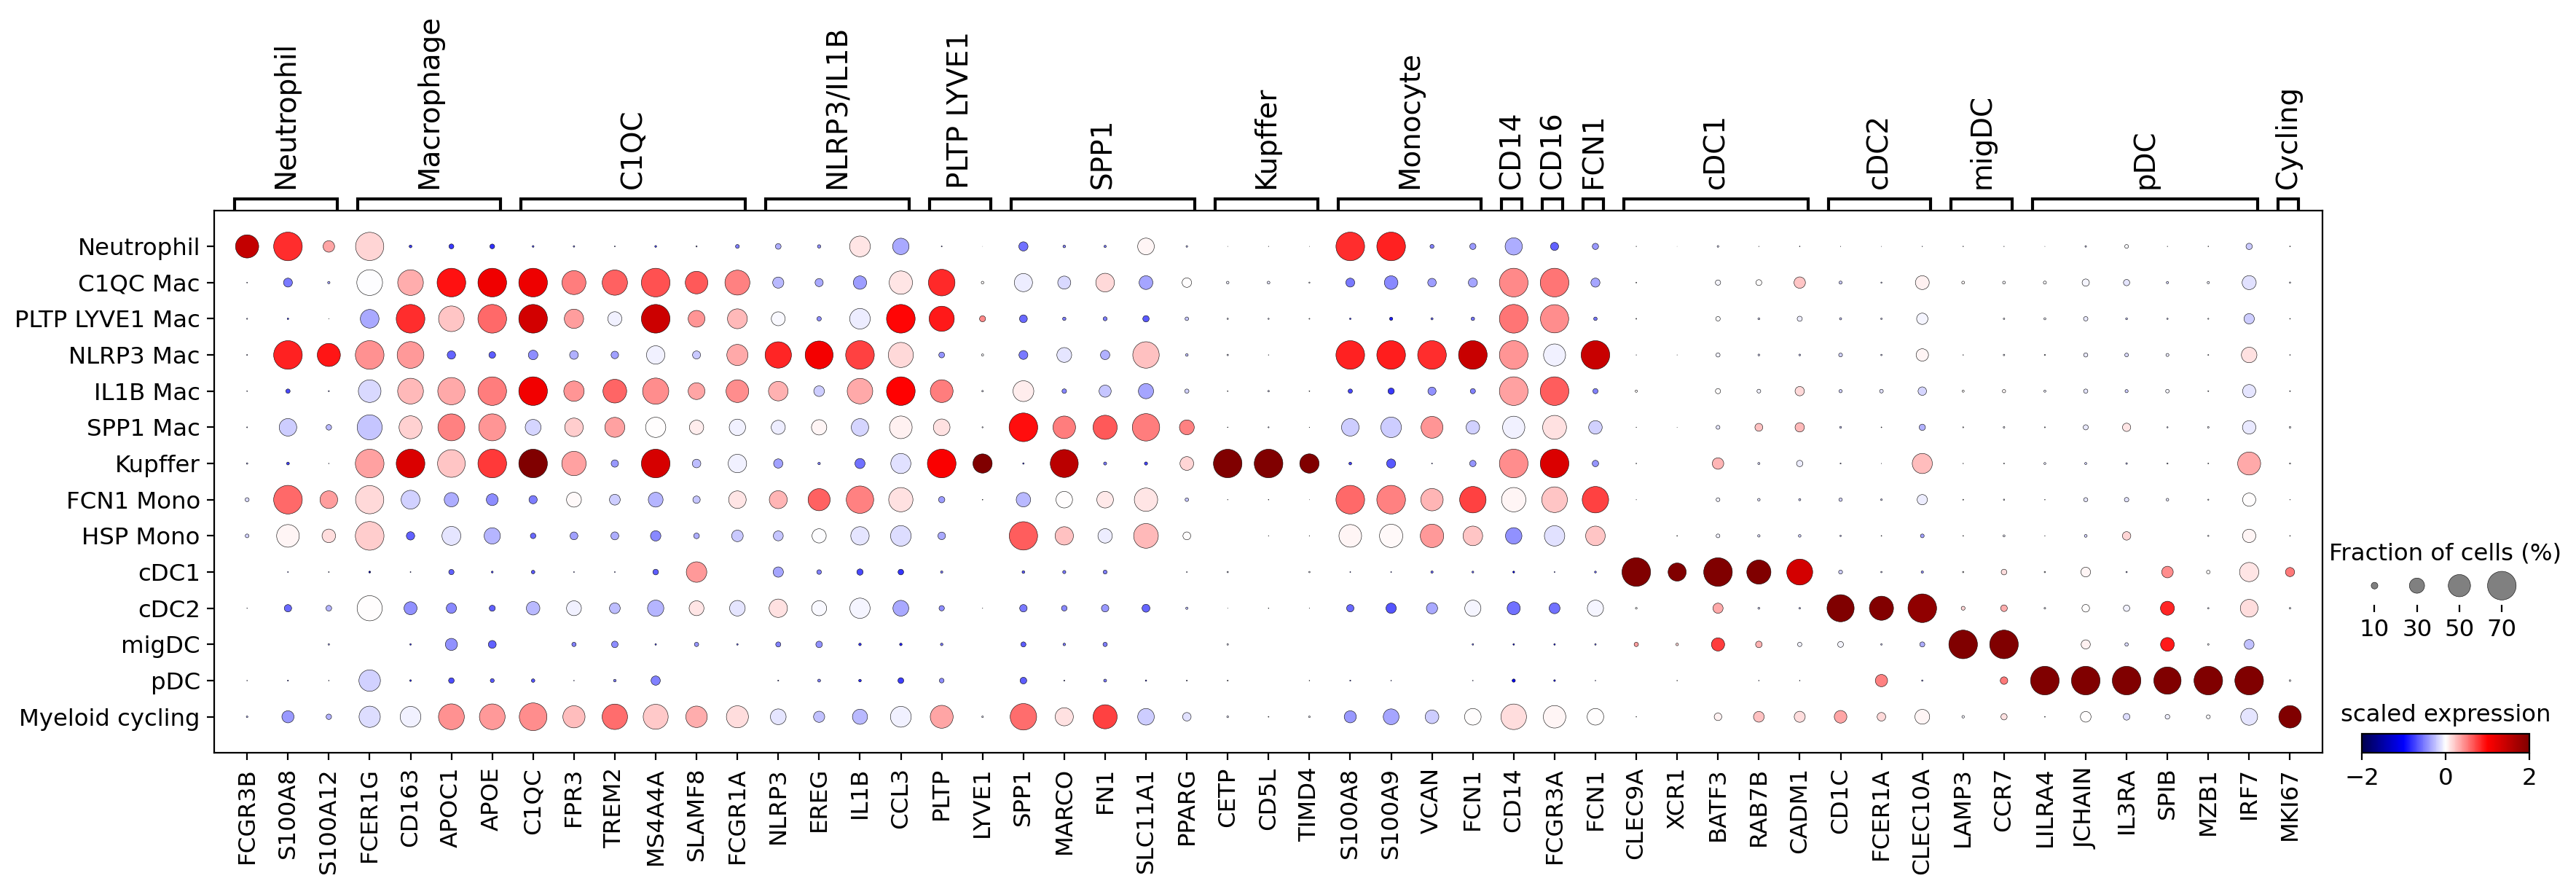

In [68]:
sc.pl.dotplot(adata=adata_zscore, 
              var_names=markers_all,
              categories_order=[
        "Neutrophil",
        "C1QC Mac",
        "PLTP LYVE1 Mac",
        "NLRP3 Mac",
        "IL1B Mac",
        "SPP1 Mac",
        "Kupffer",
        "FCN1 Mono",
        "HSP Mono",
        "cDC1",
        "cDC2",
        "migDC",
        "pDC",
        "Myeloid cycling"    
    ],
              groupby="Annotation_scVI_detailed",
              cmap="seismic", 
              layer="scaled", 
              vmin=-2,
              vmax=2, 
              dot_max=0.7, 
              colorbar_title = "scaled expression", 
              size_title="Fraction of cells (%)",
              save='zscore_general.pdf')

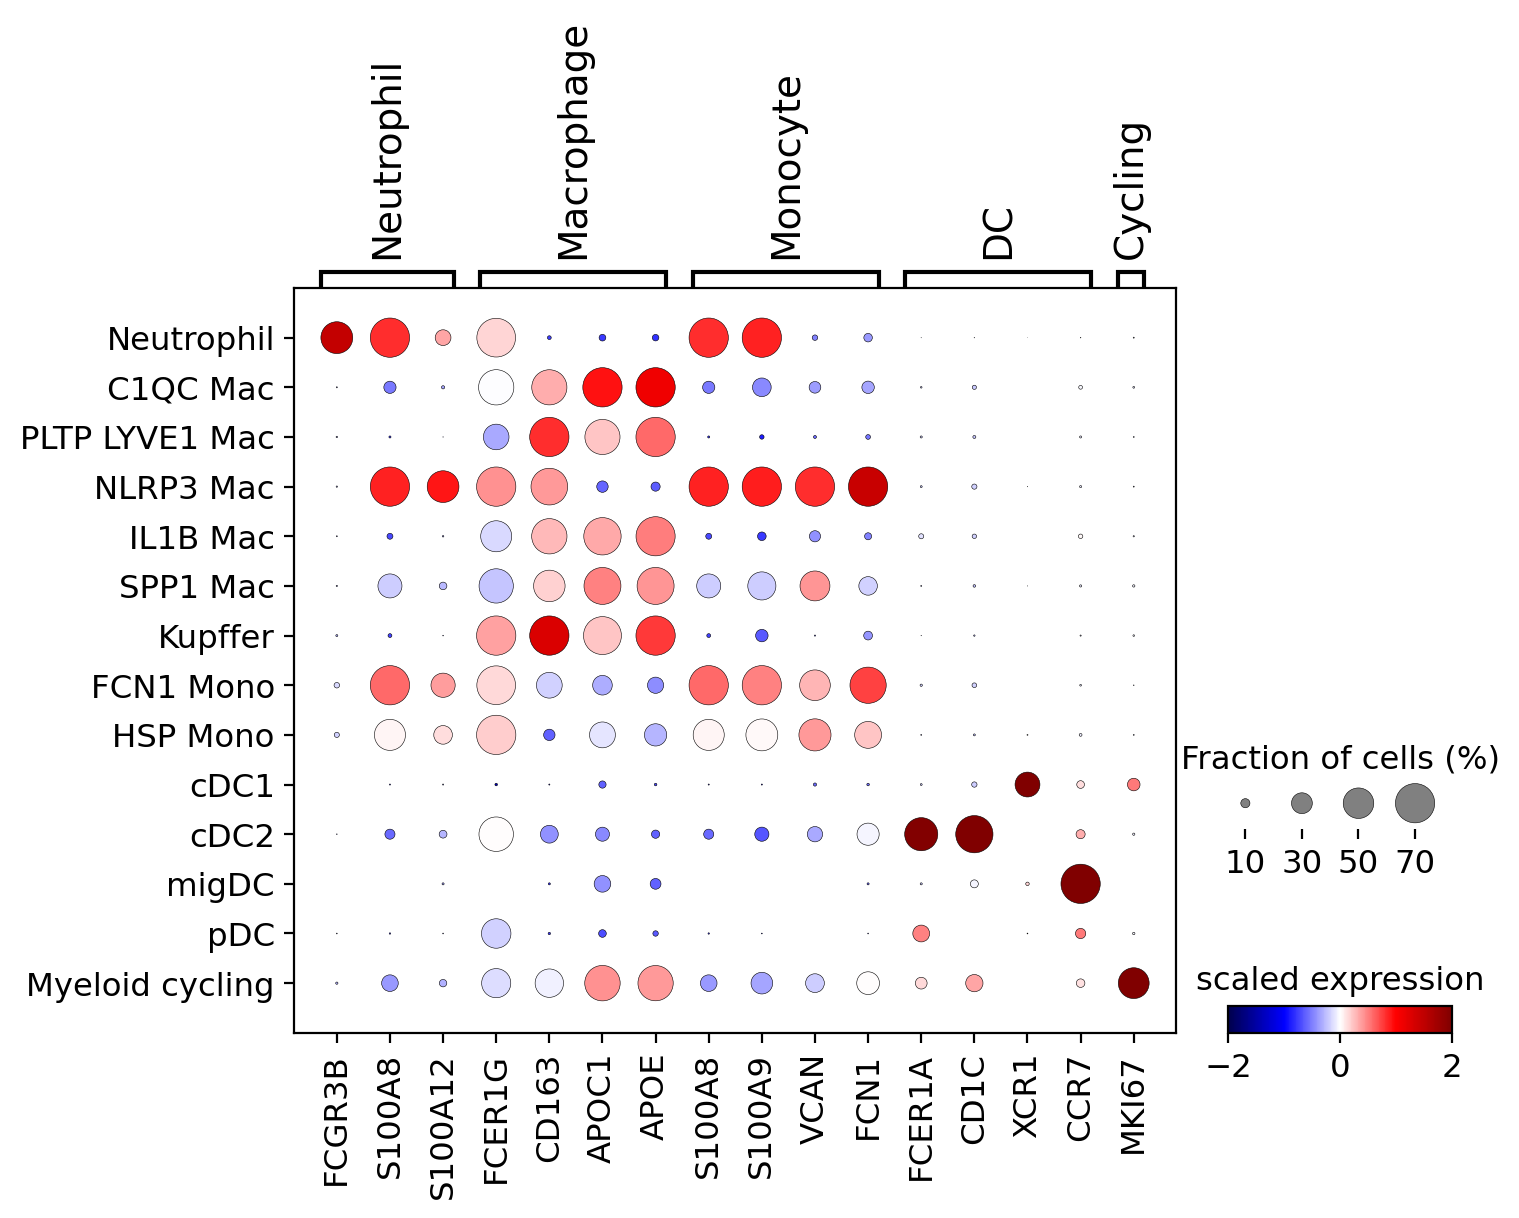

In [46]:
marker_general_only_dict = {
    "Neutrophil": ["FCGR3B", "S100A8", "S100A12"],
    "Macrophage": ["FCER1G", "CD163", "APOC1", "APOE"],
    "Monocyte": ["S100A8", "S100A9", "VCAN", "FCN1"],
    "DC": ["FCER1A", "CD1C", "XCR1", "CCR7"],
    "Cycling": ["MKI67"]
}

sc.pl.dotplot(adata=adata_zscore, 
              var_names=marker_general_only_dict,
              categories_order=[
        "Neutrophil",
        "C1QC Mac",
        "PLTP LYVE1 Mac",
        "NLRP3 Mac",
        "IL1B Mac",
        "SPP1 Mac",
        "Kupffer",
        "FCN1 Mono",
        "HSP Mono",
        "cDC1",
        "cDC2",
        "migDC",
        "pDC",
        "Myeloid cycling"    
    ],
              groupby="Annotation_scVI_detailed",
              cmap="seismic", 
              layer="scaled", 
              vmin=-2,
              vmax=2, 
              dot_max=0.7, 
              colorbar_title = "scaled expression", 
              size_title="Fraction of cells (%)",
              save='zscore_general_mac_mono_dc_only.pdf')

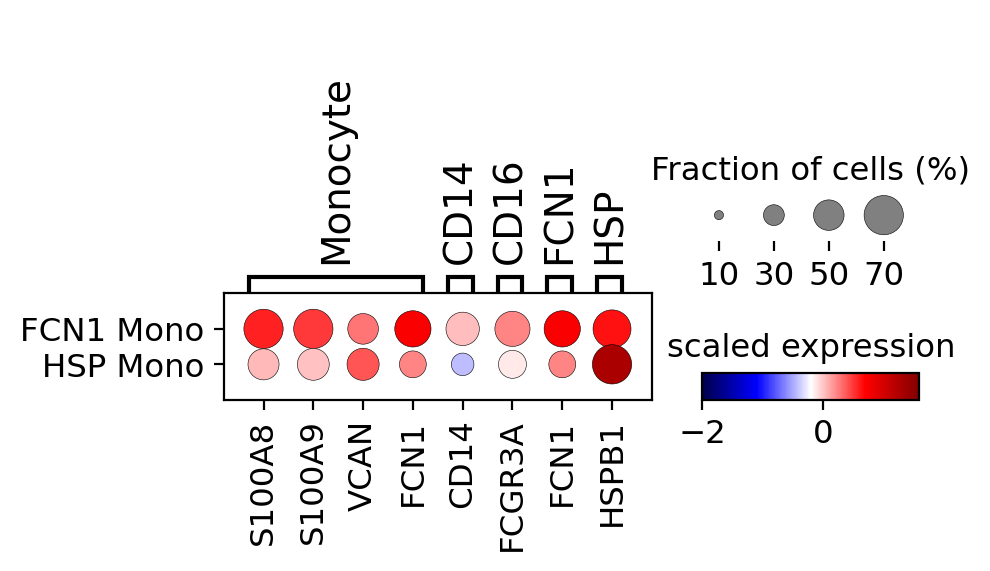

In [15]:
sc.pl.dotplot(
    adata_zscore[adata_zscore.obs.Annotation_scVI_detailed.str.contains("Mono")],
    groupby="Annotation_scVI_detailed",
    var_names=markers_monocyte,
    categories_order=["FCN1 Mono", "HSP Mono"],
    cmap="seismic", 
    layer="scaled", 
    vmin=-2,
    vmax=1.6,
    colorbar_title="scaled expression",
    size_title = "Fraction of cells (%)",
    dot_max=0.7, 
    dendrogram=False,
    save="dotplot_mean_mono_zscore.pdf",
    show=True,
)

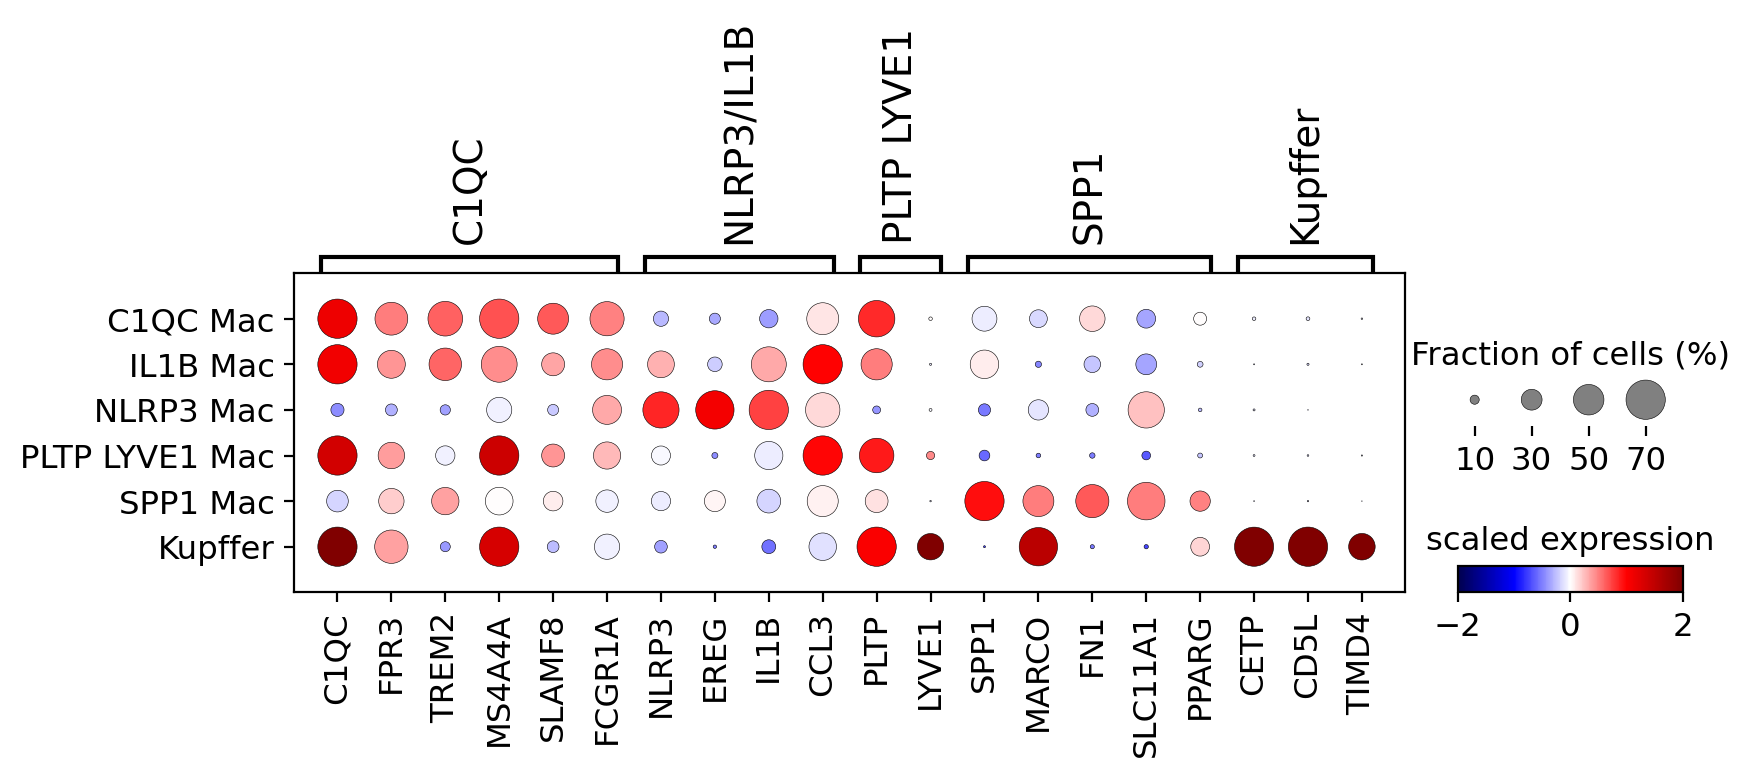

In [61]:
sc.pl.dotplot(
    adata_zscore[adata_zscore.obs.Annotation_scVI_detailed.str.contains("Mac|Kupffer")],
    groupby="Annotation_scVI_detailed",
    var_names=markers_macrophage,
    categories_order=["C1QC Mac", "IL1B Mac", "NLRP3 Mac", "PLTP LYVE1 Mac", "SPP1 Mac", "Kupffer"],
    cmap="seismic", 
    layer="scaled", 
    vmin=-2,
    vmax=2,
    colorbar_title="scaled expression",
    size_title = "Fraction of cells (%)",
    dot_max=0.7, 
    dendrogram=False,
    save="dotplot_mean_mac_zscore.pdf",
    show=True,
)

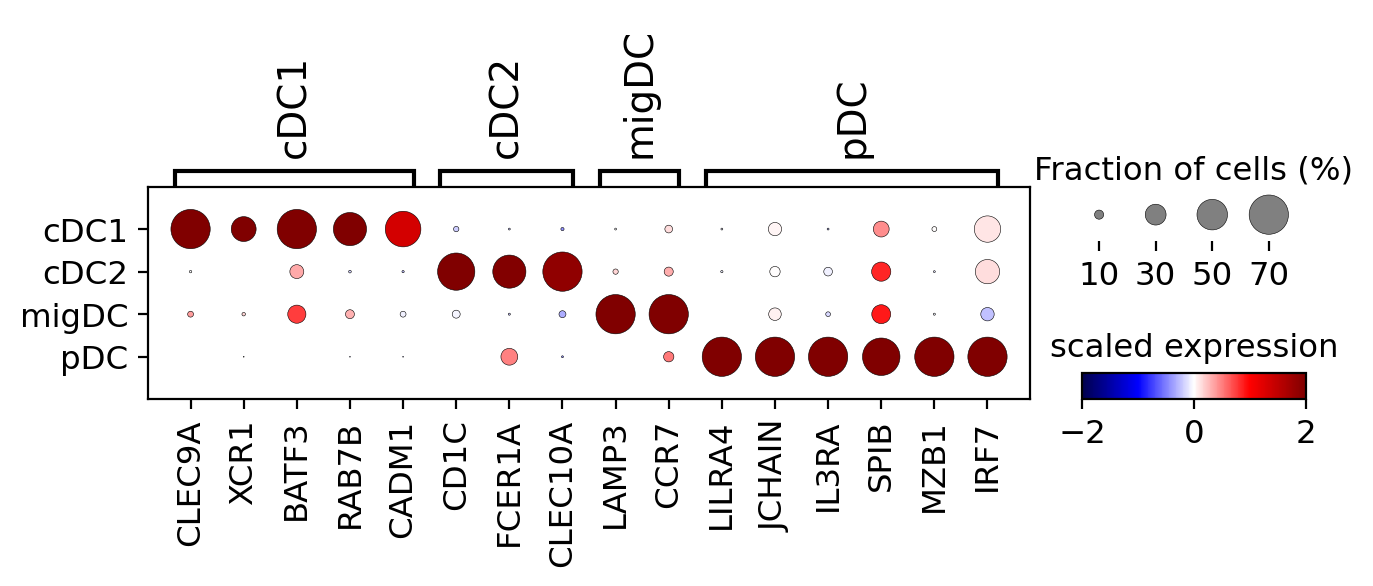

In [25]:
sc.pl.dotplot(
    adata_zscore[adata_zscore.obs.Annotation_scVI_detailed.str.contains("DC")],
    groupby="Annotation_scVI_detailed",
    var_names=DC_markers,
    cmap="seismic", 
    layer="scaled", 
    vmin=-2,
    vmax=2,
    colorbar_title="scaled expression",
    size_title = "Fraction of cells (%)",
    dot_max=0.7,
    dendrogram=False,
    save="dotplot_mean_DC_zscore.pdf",
    show=True,
)

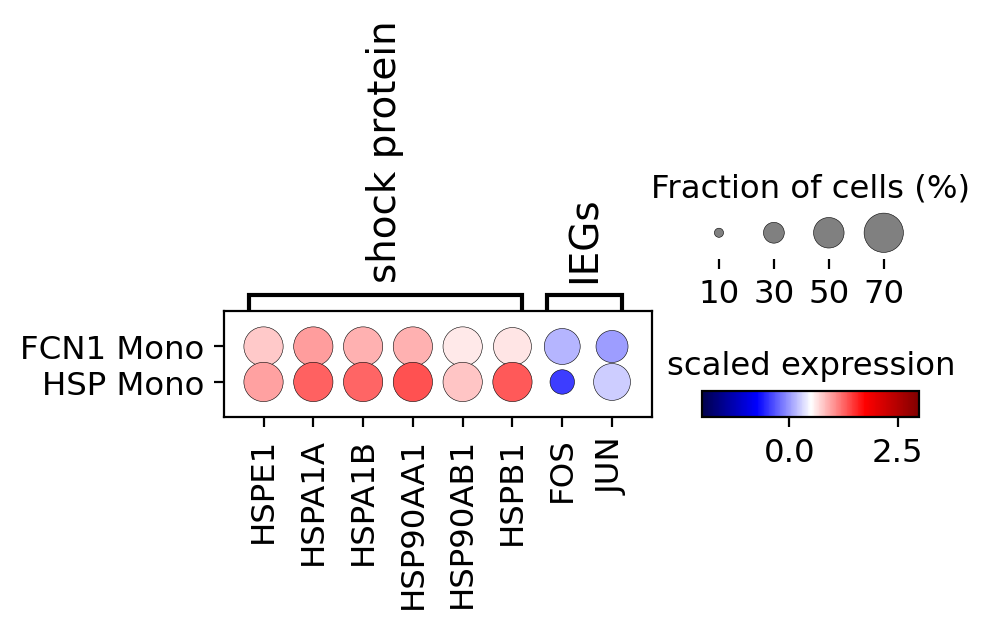

In [35]:
dissocation_markers_dict = {
    "shock protein": [
        "HSPE1",
        "HSPA1A",
        "HSPA1B",
        "HSP90AA1",
        "HSP90AB1",
        "HSPB1",
    ],
    "IEGs": ["FOS", "JUN"],
}

sc.pl.dotplot(adata=adata_zscore[adata_zscore.obs.Annotation_scVI_detailed.str.contains("Mono")], #adata_zscore, 
              var_names=dissocation_markers_dict,
                  categories_order = [
        "FCN1 Mono",
        "HSP Mono",
    ],
              groupby="Annotation_scVI_detailed",
              cmap="seismic", 
              layer="scaled", 
              vmin=-2,
              vmax=3, 
              dot_max=0.7, 
              colorbar_title = "scaled expression", 
              size_title="Fraction of cells (%)",
              save='zscore_general_HSP.pdf')

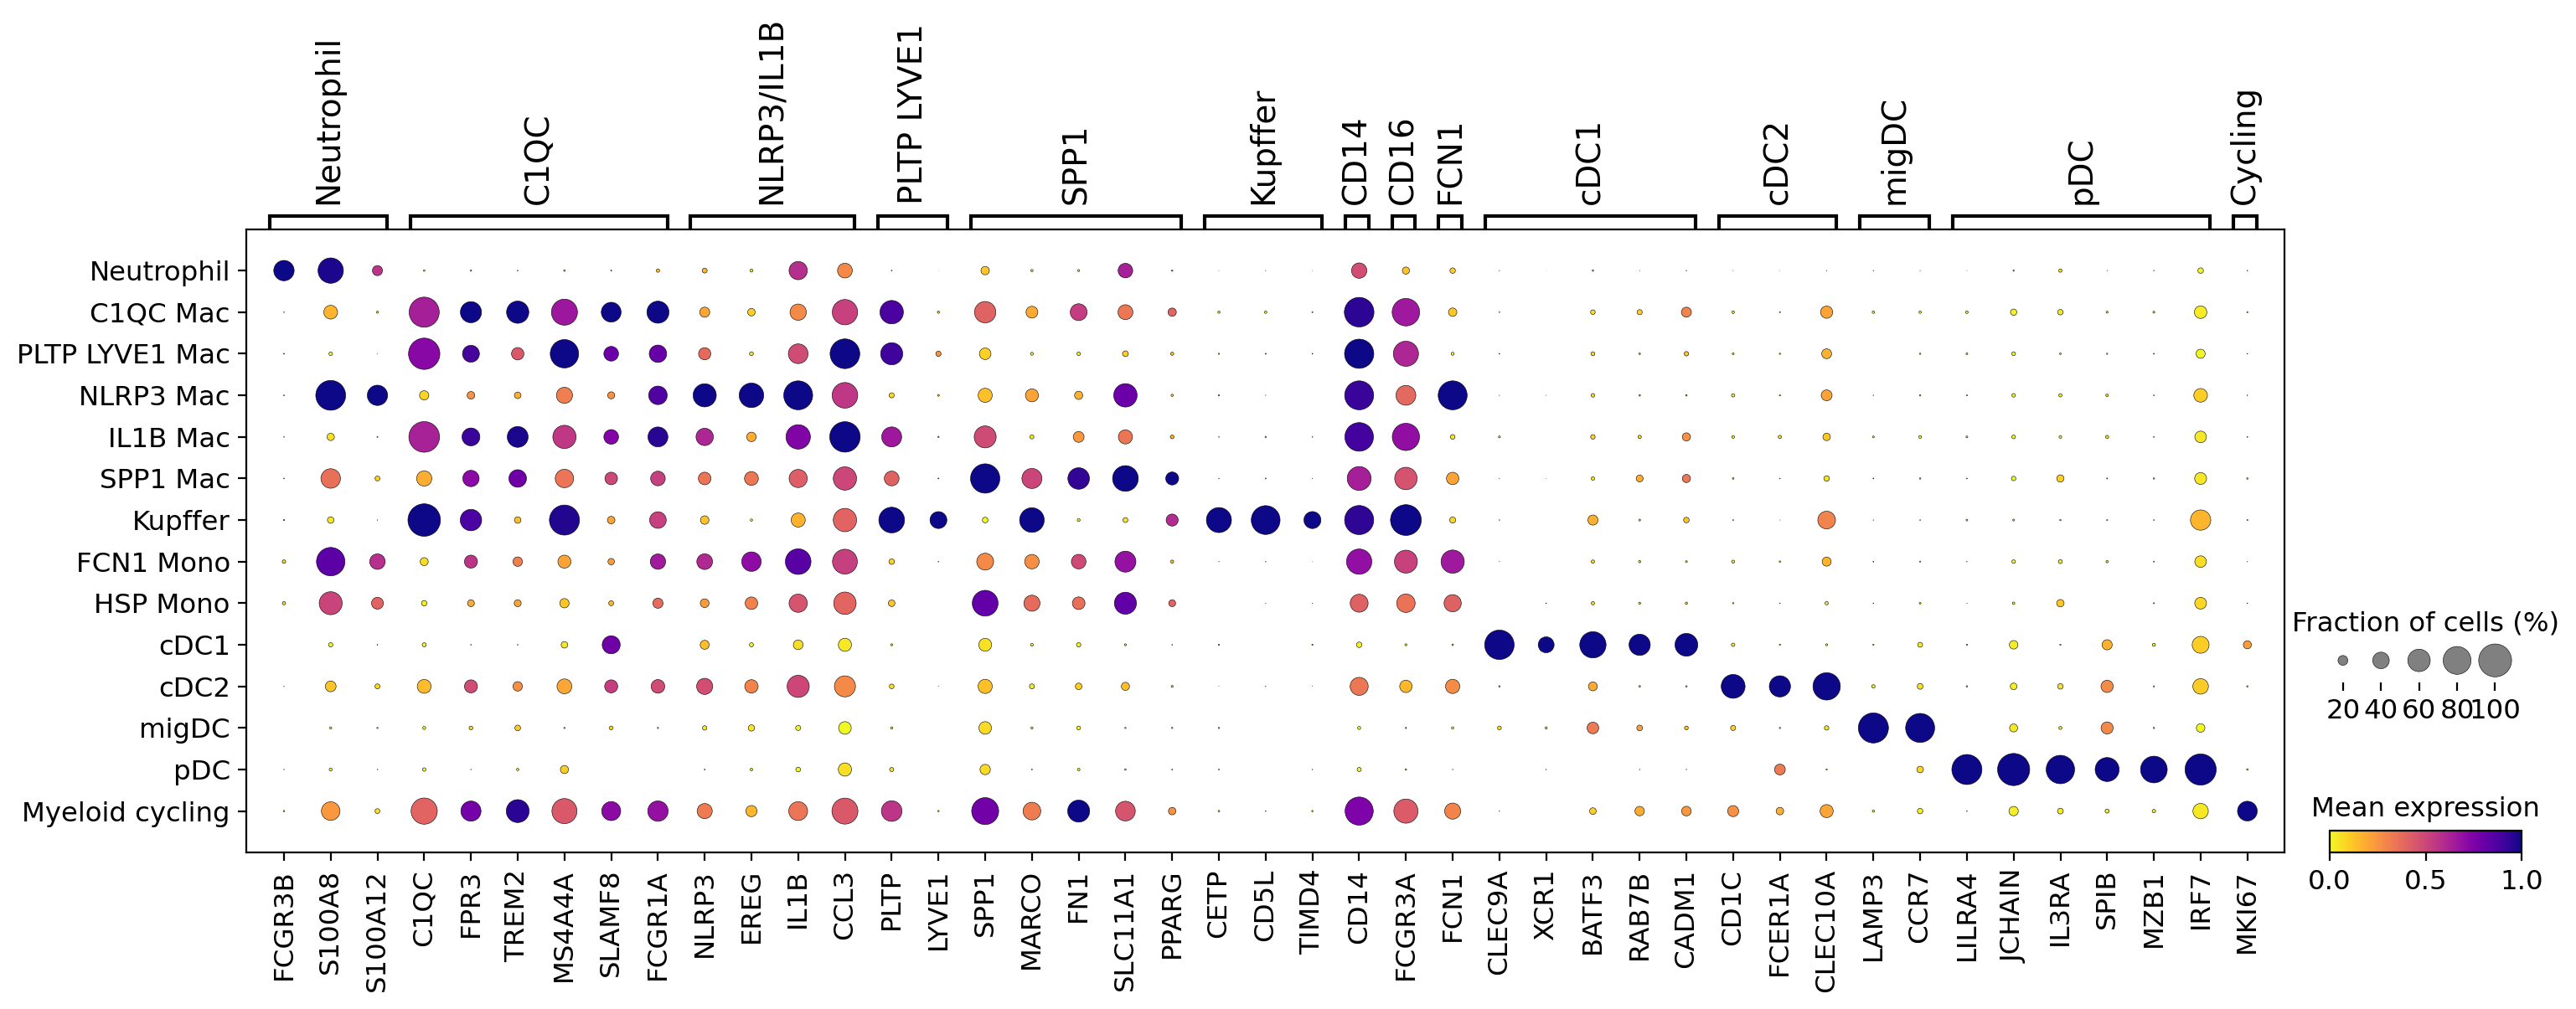

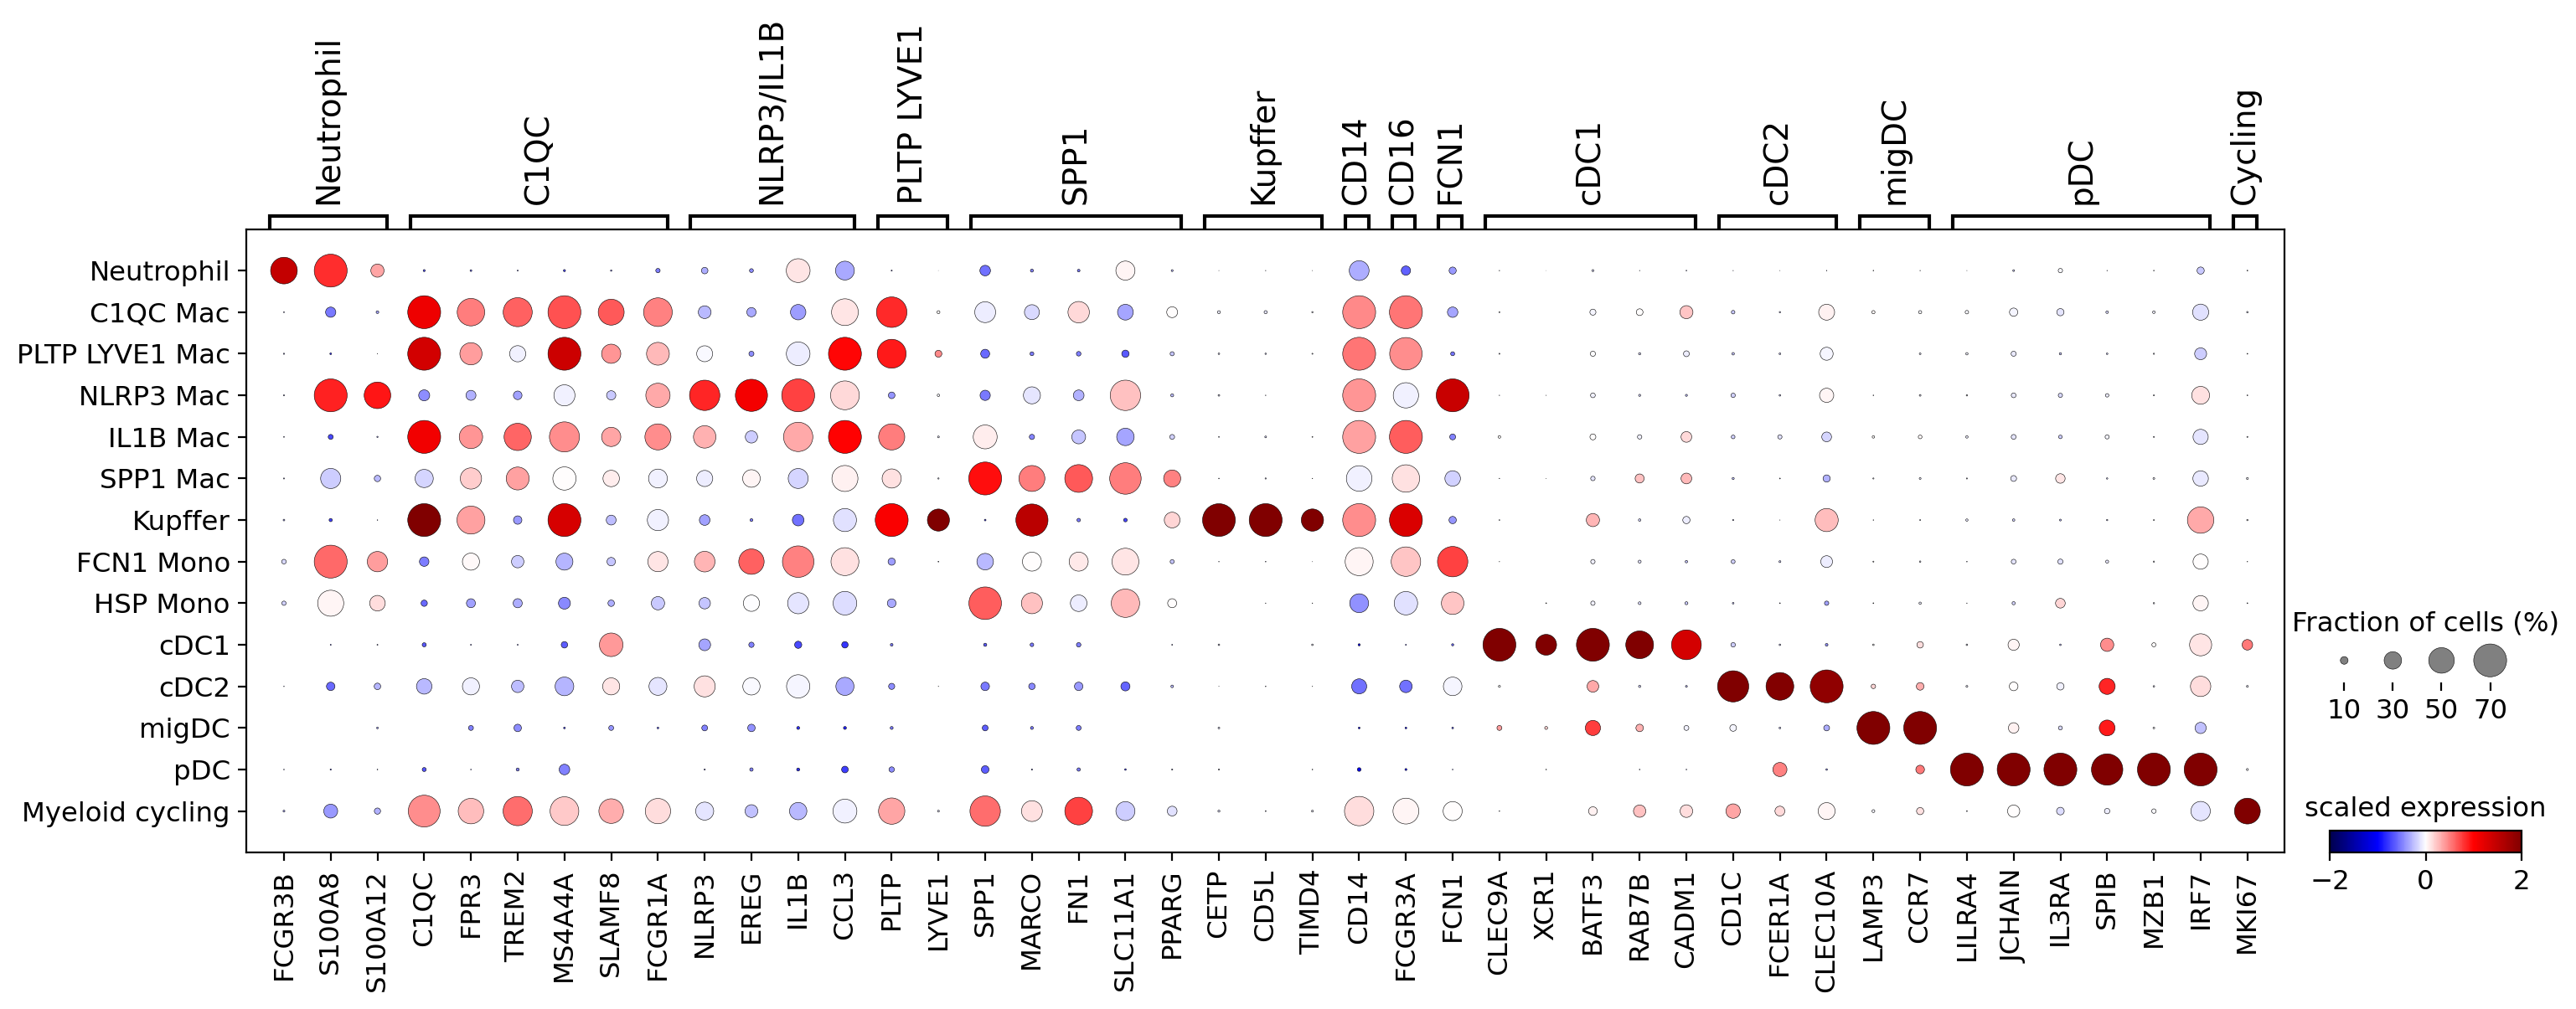

In [32]:
## don't put macorphage and mono
markers_no_monomac = {
    "Neutrophil": ["FCGR3B", "S100A8", "S100A12"],
    #"Macrophage": ["FCER1G", "CD163", "APOC1", "APOE"], # "C1QC"
    "C1QC": ["C1QC", "FPR3", "TREM2", "MS4A4A", "SLAMF8", "FCGR1A"],
    "NLRP3/IL1B": ["NLRP3", "EREG", "IL1B", "CCL3"],
    "PLTP LYVE1": ["PLTP", "LYVE1"],
    "SPP1": ["SPP1", "MARCO", "FN1", "SLC11A1", "PPARG"],
    "Kupffer": ["CETP", "CD5L", "TIMD4"],
    #"Monocyte": ["S100A8", "S100A9", "VCAN", "FCN1"],
    "CD14": ["CD14"],
    "CD16": ["FCGR3A"],
    "FCN1": ["FCN1"],
    #"DC": ["FCER1A", "PKIB", "CD1C", "PCLAF", "CLEC10A"],
    "cDC1": ["CLEC9A", "XCR1", "BATF3", "RAB7B", "CADM1"],
    "cDC2": ["CD1C", "FCER1A", "CLEC10A", ],
    #"DC3": ["CLEC10A", "S100A8", "CD36", "CD163"],
    "migDC": ["LAMP3", "CCR7"],
    "pDC": ["LILRA4", "JCHAIN", "IL3RA", "SPIB", "MZB1", "IRF7"],
    "Cycling": ["MKI67"],
}

sc.pl.dotplot(
    adata,
    groupby="Annotation_scVI_detailed",
    categories_order=[
        "Neutrophil",
        "C1QC Mac",
        "PLTP LYVE1 Mac",
        "NLRP3 Mac",
        "IL1B Mac",
        "SPP1 Mac",
        "Kupffer",
        "FCN1 Mono",
        "HSP Mono",
        "cDC1",
        "cDC2",
        "migDC",
        "pDC",
        "Myeloid cycling"    
    ],
    use_raw=True,
    var_names=markers_no_monomac,
    cmap="plasma_r",
    standard_scale="var",
    vmin=0,
    vmax=1,
    colorbar_title="Mean expression",
    size_title="Fraction of cells (%)",
    dendrogram=False,
    save="dotplot_mean_all_no_mono_mac.pdf",
    show=True,
)

sc.pl.dotplot(adata=adata_zscore, 
              var_names=markers_no_monomac,
              categories_order=[
        "Neutrophil",
        "C1QC Mac",
        "PLTP LYVE1 Mac",
        "NLRP3 Mac",
        "IL1B Mac",
        "SPP1 Mac",
        "Kupffer",
        "FCN1 Mono",
        "HSP Mono",
        "cDC1",
        "cDC2",
        "migDC",
        "pDC",
        "Myeloid cycling"   
    ],
              groupby="Annotation_scVI_detailed",
              cmap="seismic", 
              layer="scaled", 
              vmin=-2,
              vmax=2, 
              dot_max=0.7, 
              colorbar_title = "scaled expression", 
              size_title="Fraction of cells (%)",
              save='zscore_general_no_mono_mac.pdf')

MARCO, TREM2, and CD36 in lipid-laden TAM

ovascularization as tumors outgrow and hypoxic areas arise.49 Cancer cells in lowly oxygenated hypoxic pockets generate a CXC chemokine gradient (e.g., CXCL7, CXCL12, and CXCL16) to attract macrophages

rthogonally, TAMs promote tumor angiogenesis by stimulating the degradation of the perivascular ECM via secretion of MMP2, 9, 13, and 14 and other proteases

https://www.sciencedirect.com/science/article/pii/S0092867423001630

Highly express Trem2, GPNMB AND LIPID PROGRAMS. Yofe, Shani et al cancer discovery 2023

from Macrophage diversity in cancer revisited in the era of single-cell omics: 
- APOE and FABP5 in CRC
- LA-TAMs have the expression signature of lipid-related genes, including APOC1, APOE, ACP5, and FABP5, and a distinctive enrichment of lipid metabolism and oxidative phosphorylation pathways [

### Lipid laden tams

from Macrophage diversity in cancer revisited in the era of single-cell omics: IFN-TAMs have high expression of IFN-regulated genes, such as CXCL10 [25,27,28], PDL1 [12,29], and ISG15 [25], and M1-like markers, such as CD86 and MHCII [12]. Among all TAM subsets, IFN-TAMs resemble M1-like macrophages the most. However, contrary to the common belief that M1-like macrophage would have anti-tumor functions, IFN-TAMs resemble recently identified immunosuppressive macrophages that suppress immune responses through tryptophan degradation and the recruitment of immunosuppressive regulatory T cells (Tregs). High expression of immune checkpoint molecules, such as PD-L1, as well as IDO, in IFN-TAMs can be regulated by signal transducer and activator of transcription 1 (STAT1), STAT2, ETS variant transcription factor 7 (ETV7), and IFN regulatory factor 1 (IRF1).

In [ ]:
tam_ith = {
    "Lipid-laden" : ["TREM2", "ACP5", "APOE", "APOC1", "GPNMB", "FABP5", "CD36", "MARCO",
                     "LIPA", "CTSB", "LGALS3",
                   "MMP9", "MRC1", "SPP1"],
    "Angio": ["SPP1", "VCAN", "TIMP1", "VEGFA",  "BNIP3", "CD44", "CLEC5A", "CTSB", 
              "FLT1", "FN1","IL1RN", "PPARG", ],
    "Inflam": ["CCL3", "CCL3L1", "CCL4L2", "CXCL2", "CXCL3", "CXCL8", "IL1B"],
    "IFN-TAMs": ["CXCL10", "CD274", "ISG15", "CD86", "CCL2", "IFIT1", "IFIT2", "IFIT3", "IFITM1"], 
    "RTM": ["CD5L", "VSIG4", "LYVE1", "HES1", "FOLR2"],
}


sc.pl.dotplot(
    adata_zscore[adata_zscore.obs.Annotation_scVI_detailed.str.contains("Mac|Kupffer")].copy(),
    groupby="Annotation_scVI_detailed",
    use_raw=False,
    var_names=tam_ith,
    cmap="seismic", 
    layer="scaled",
    vmin=-2,
    vmax=2,
    dot_max=0.5, 
    colorbar_title="scaled expression",
    size_title = "Fraction of cells (%)",
    dendrogram=False,
    save="Mac_dotplot_TAMSsubset_signatures.pdf",
    show=True,
)

sc.pl.dotplot(
    adata[adata.obs.Annotation_scVI_detailed.str.contains("Mac|Kupffer")].copy(),
    groupby="Annotation_scVI_detailed",
    use_raw=True,
    var_names=tam_ith,
    cmap="plasma_r", 
    vmin=0,
    vmax=1,
    #dot_max=0.5, 
    colorbar_title="Mean expression",
    size_title = "Fraction of cells (%)",
    dendrogram=False,
    save="Mac_dotplot_TAMSsubset_signatures_gene_exp.pdf",
    show=True,
)

### compute gene scores of these signatures and then show it in violin plots

In [ ]:
adata_tams = adata[
    adata.obs.Annotation_scVI_detailed.str.contains("Mac|Kupffer")
].copy()

# compute scores
for k in tam_ith.keys():
    sc.tl.score_genes(
    adata_tams, gene_list=tam_ith[k], score_name=f"{k}_score", use_raw=True)

In [ ]:
tam_ith.keys()

In [ ]:
list(adata_tams.obs.Annotation_scVI_detailed.cat.categories)

In [ ]:
sns.set_style("white")
sns.set_theme(style="ticks")

xticklabels = list(adata_tams.obs.Annotation_scVI_detailed.cat.categories)
palette = ["#80b1d3", "#fb8072", "#e78ac3", "#fdb462", "#fccde5", "#8dd3c7"]

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(16,3), gridspec_kw={'wspace':0.3})
ax1 = sns.violinplot(data=adata_tams.obs, x="Annotation_scVI_detailed", 
                     y="Lipid-laden_score", ax=ax1, palette=palette)
ax2 = sns.violinplot(data=adata_tams.obs, x="Annotation_scVI_detailed", 
                     y="Angio_score", ax=ax2, palette=palette)
ax3 = sns.violinplot(data=adata_tams.obs, x="Annotation_scVI_detailed", 
                     y="Inflam_score", ax=ax3, palette=palette)
ax4 = sns.violinplot(data=adata_tams.obs, x="Annotation_scVI_detailed", 
                     y="IFN-TAMs_score", ax=ax4, palette=palette)
ax5 = sns.violinplot(data=adata_tams.obs, x="Annotation_scVI_detailed", 
                     y="RTM_score", ax=ax5, palette=palette)


ax1.set_title("Lipid-laden-TAMS")
ax2.set_title("Angio-TAMs")
ax3.set_title("Inflammatory-TAMs")
ax4.set_title("IFN-TAMs")
ax5.set_title("RTM-TAMs")

ax1.set(xlabel=None)
ax1.set(ylabel="Gene signature score")

ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
              

ax1.set_xticklabels(xticklabels, rotation = 90)
ax2.set_xticklabels(xticklabels, rotation = 90)
ax3.set_xticklabels(xticklabels, rotation = 90)
ax4.set_xticklabels(xticklabels, rotation = 90)
ax5.set_xticklabels(xticklabels, rotation = 90)


#ax1.set_ylim([0, 2])
#ax2.set_ylim([0, 2])
#ax3.set_ylim([0, 2])
#ax4.set_ylim([0, 2])
#ax5.set_ylim([0, 2])

plt.savefig(FIG2SAVE.joinpath("Mac_signature_scores_violinplot.pdf"), 
            dpi=DPI, 
            format="pdf",
            bbox_inches="tight")

In [8]:
FIG2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/subpopulations/Myeloid/final/figures/forpaper')

### Score for monocyttes from same paper Macrophage diversity in cancer revisited in the era of single-cell omics

In [7]:
monocyte_ith = {
    # CD14+ cd16 - 
    "Classical TIMs": ["S100A4", "S100A6", "S100A8", "S100A9", "S100A12", "S100A13", "AREG", "CCL4",
                       "CCR2", "CD14", "CD300E", "CD36", "CEBPD", "CLEC11A", "CLEC12A", 
                       "CSF1R", "CTSS", "CX3CR1", "CXCL2", "CXCR4", "EGR1", "FCN1", "FOS", "FTH1", "IL1B", 
                       "ITGAM", "JUNB", "LGALS2", "LY6C1", "LY6C2", "LYZ", "MAF", "MAFB", "MPEG1", "NFKB1",
                       "NFKBIA", "NLRP3", "NR4A1", "NR4A2", "OSM", "PTGS2", "RGS2", "SELL", "THBS1", "VCAN"],
    # CD16 +, CD14-
    "Nonclassical monocytes": ["CX3CR1", "CCL5", "CD52", "CDH23", "CDKN1C", "FCGR3A" "FCGR3B", "FCGR4", "GNLY",
                               "GZMB", "ICAM2", "IFITM1", "IL32", "KLRC4", "KLRK1", "LILRA1", "LILRB1",
                               "MS4A7", "MTSS1", "PRF1", "SLC44A2"],
    # cd 14 cd 16 ++
    "Intermediate monocytes": ["CCL2" "CCL8", "CX3CR1", "CXCL10", "FCGR3A", "IFITM2", "IL1RN", "IRF7",
                               "ISG15", "ISIG20", "LILRB1", "LILRA1", "MS4A7", "MTSS1", "RHOC", "SERPINA1",
                               "SIGLEC10", "STAT1", "TCF7L2", "TNFSF10", "TNFSF13B"]
}

In [8]:
adata_mono = adata[
    adata.obs.Annotation_scVI_detailed.str.contains("Mono")
].copy()

# compute scores
for k in monocyte_ith.keys():
    sc.tl.score_genes(
    adata_mono, gene_list=monocyte_ith[k], score_name=f"{k}_score", use_raw=True)

/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [9]:
list(adata_mono.obs.Annotation_scVI_detailed.cat.categories)

['FCN1 Mono', 'HSP Mono']

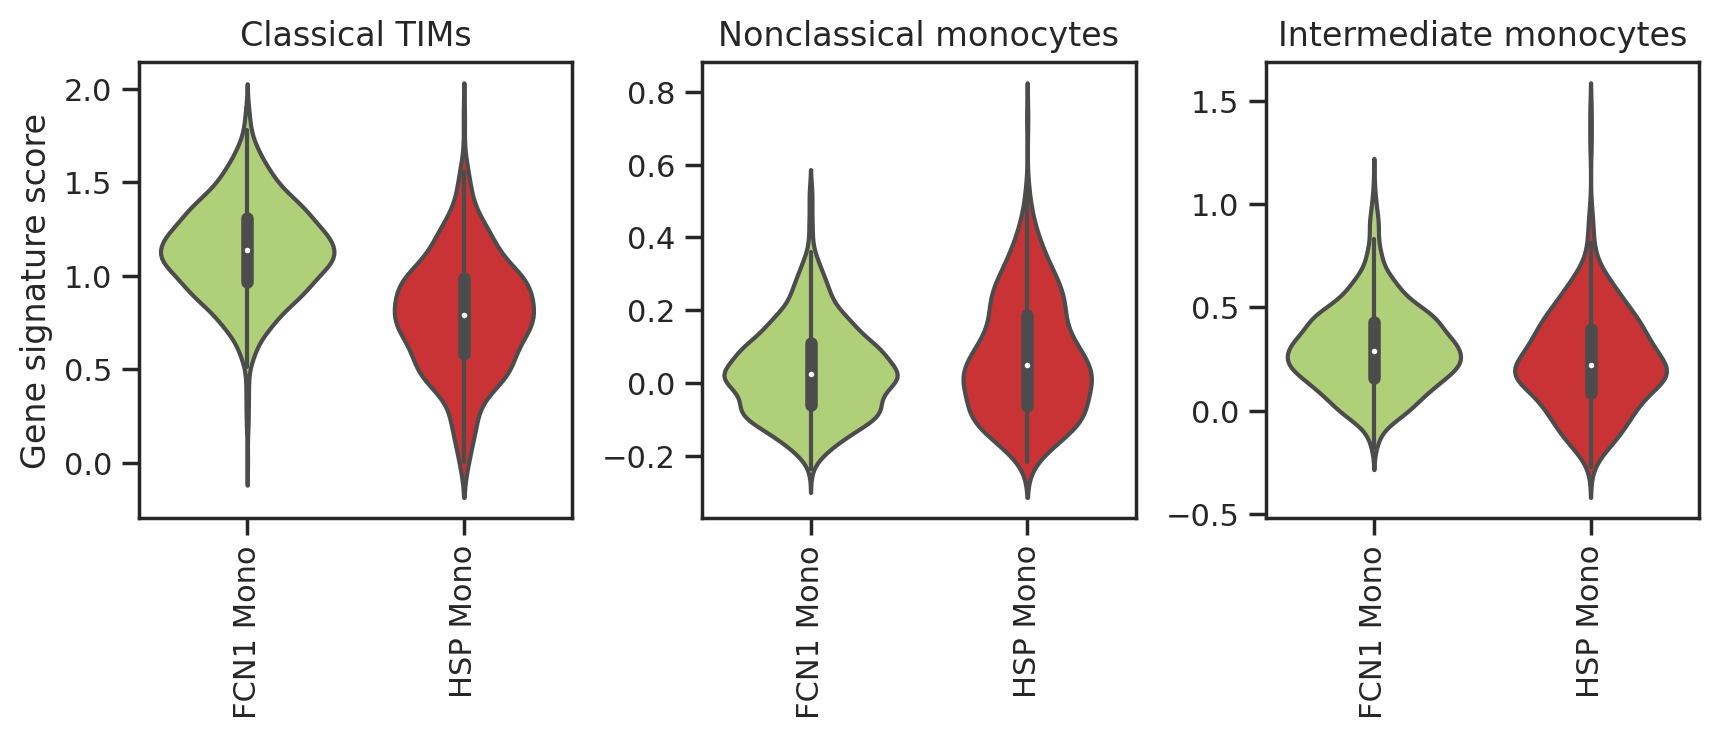

In [11]:
sns.set_style("white")
sns.set_theme(style="ticks")

xticklabels = list(adata_mono.obs.Annotation_scVI_detailed.cat.categories)
palette = ["#b3de69", "#e31a1c"]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3), gridspec_kw={'wspace':0.3})
ax1 = sns.violinplot(data=adata_mono.obs, x="Annotation_scVI_detailed", 
                     y="Classical TIMs_score", ax=ax1, palette=palette)
ax2 = sns.violinplot(data=adata_mono.obs, x="Annotation_scVI_detailed", 
                     y="Nonclassical monocytes_score", ax=ax2, palette=palette)
ax3 = sns.violinplot(data=adata_mono.obs, x="Annotation_scVI_detailed", 
                     y="Intermediate monocytes_score", ax=ax3, palette=palette)

ax1.set_title('Classical TIMs')
ax2.set_title('Nonclassical monocytes')
ax3.set_title('Intermediate monocytes')

ax1.set(xlabel=None)
ax1.set(ylabel="Gene signature score")

ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3.set(xlabel=None)
ax3.set(ylabel=None)           

ax1.set_xticklabels(xticklabels, rotation = 90)
ax2.set_xticklabels(xticklabels, rotation = 90)
ax3.set_xticklabels(xticklabels, rotation = 90)

plt.savefig(FIG2SAVE.joinpath("Monocyte_signature_scores_violinplot.pdf"), 
            dpi=DPI, 
            format="pdf",
            bbox_inches="tight")

### proportions across datasetts

In [5]:
from matplotlib.patches import Rectangle


def proportion_cells_patient(
    adata, groupby_labels, xlabel: str, ylabel: str, colors: dict, figname: str, bbox_to_anchor=(1, 0.8)
):  # colors
    # compute proportion of cells within each group
    table2plot = (
        adata.reset_index()
        .groupby(groupby_labels)
        .size()
        .groupby(level=0)
        .apply(lambda x: x * 100 / x.sum())
        .unstack()
    )

    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        sharey=False,
        sharex=False,
        dpi=DPI,
    )  # figsize=(4, 4))

    print(table2plot)
    table2plot.plot.barh(stacked=True, ax=ax, color=colors.values())  # , color=colors
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid(False, which="major", axis="both")  # removes major horizontal gridlinesd

    labels = list(colors.keys())
    l = [Rectangle((0, 0), 0, 0, color=color) for color in list(colors.values())]
    ax.legend(
        l,
        labels,
        loc="upper left",
        bbox_to_anchor=bbox_to_anchor, #(1, 0.8),
        facecolor="white",
        edgecolor="white",
        ncol=1,
        borderaxespad=0.0,
        framealpha=0,
        frameon=False,
    )

    plt.savefig(FIG2SAVE.joinpath(figname), dpi=DPI, format="pdf", bbox_inches="tight")
    plt.show()

cell_source               BCI-Nuclei  Che-Cells   Wu-Cells
Annotation_scVI_detailed                                  
C1QC Mac                    9.970090  41.724826  48.305085
FCN1 Mono                   0.900901  48.548549  50.550551
HSP Mono                    4.651163  54.005168  41.343669
IL1B Mac                    5.818182  36.000000  58.181818
Kupffer                     5.333333   2.666667  92.000000
Myeloid cycling            14.035088  54.191033  31.773879
NLRP3 Mac                   1.493976  58.506024  40.000000
Neutrophil                  2.178423   6.362379  91.459198
PLTP LYVE1 Mac              4.006969  29.442509  66.550523
SPP1 Mac                   27.625027  38.926174  33.448798
cDC1                        4.907975  66.257669  28.834356
cDC2                        2.203500  56.059624  41.736876
migDC                      30.555556  65.277778   4.166667
pDC                         3.347280  82.426778  14.225941


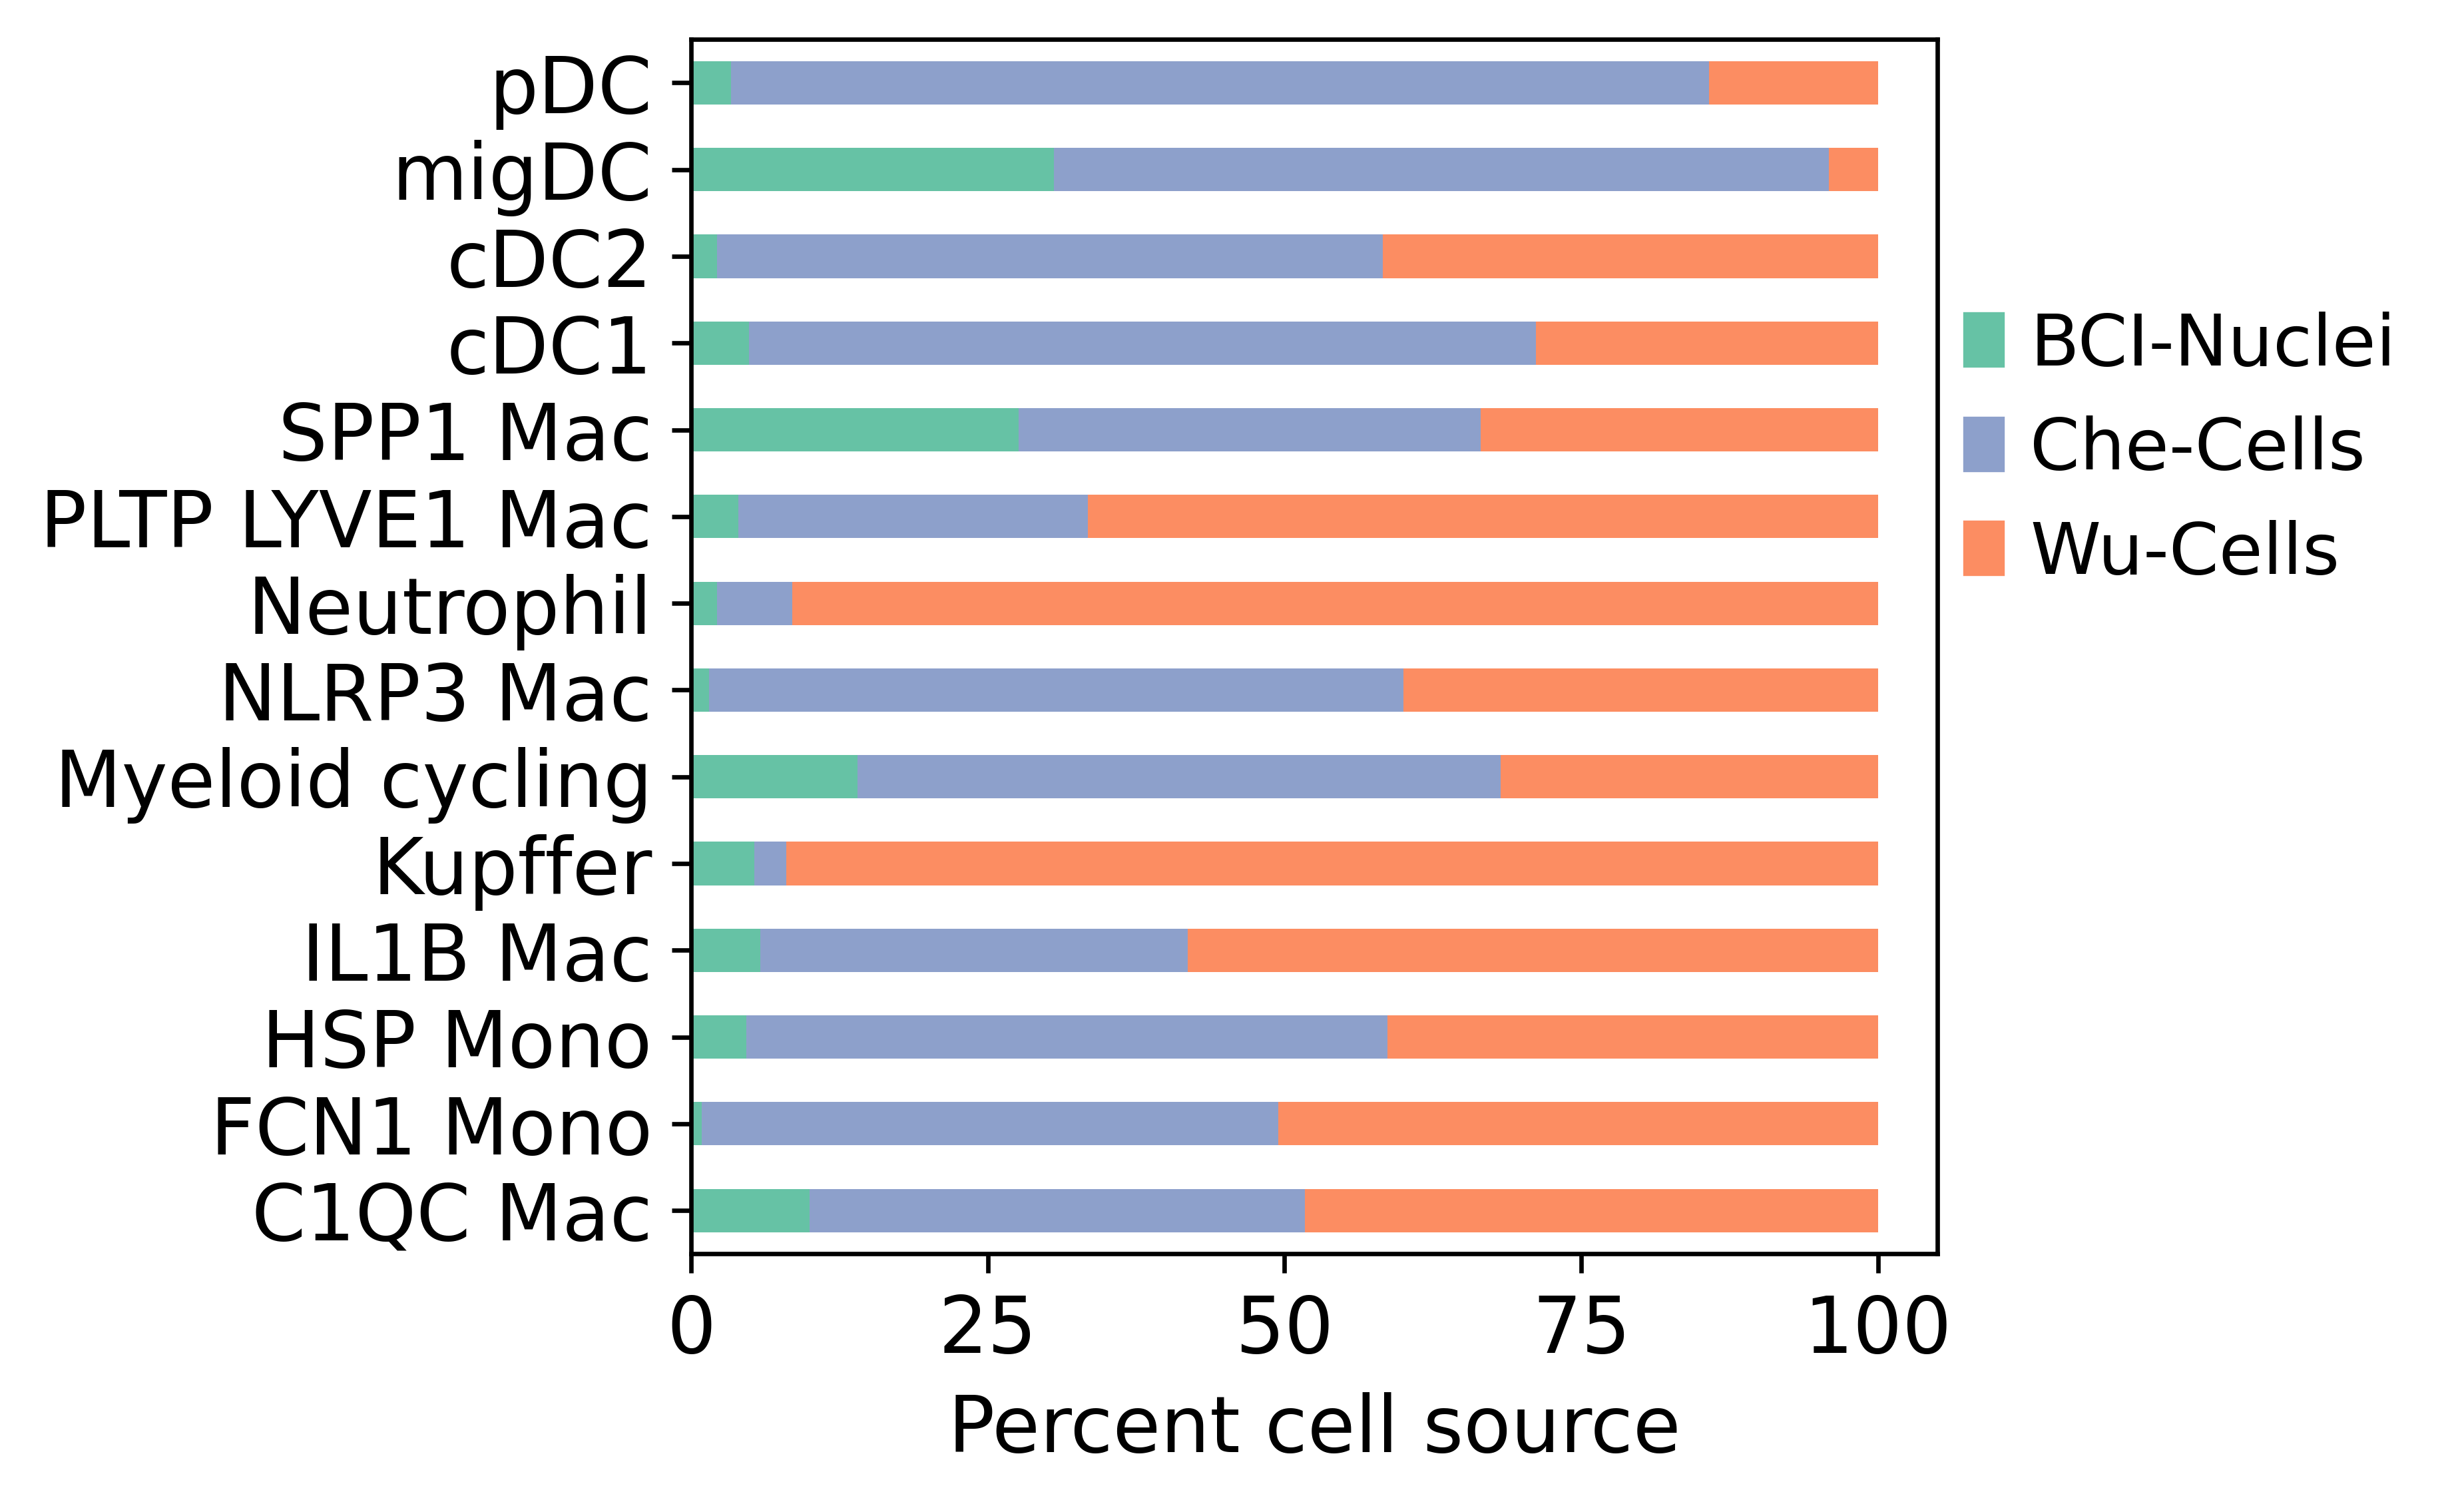

In [6]:
from collections import OrderedDict

color_dict = OrderedDict(
    zip(
        adata.obs["cell_source"].cat.categories.values.tolist(),
        adata.uns["cell_source_colors"],
    )
)

proportion_cells_patient(
    adata.obs,
    groupby_labels=["Annotation_scVI_detailed", "cell_source"],
    xlabel="Percent cell source",
    ylabel="",
    colors=color_dict,
    figname="annotation_cell_source.pdf",
)

Annotation_scVI_detailed   C1QC Mac  FCN1 Mono  HSP Mono  IL1B Mac   Kupffer  \
cell_source                                                                    
BCI-Nuclei                10.940919   0.492341  0.984683  1.750547  1.750547   
Che-Cells                 12.672218   7.342922  3.164269  2.997729  0.242241   
Wu-Cells                  11.012615   5.739289  1.818388  3.636777  6.273440   

Annotation_scVI_detailed  Myeloid cycling  NLRP3 Mac  Neutrophil  \
cell_source                                                        
BCI-Nuclei                       3.938731   1.695842    3.446389   
Che-Cells                        4.208933  18.380015    2.785768   
Wu-Cells                         1.852483   9.432890   30.060234   

Annotation_scVI_detailed  PLTP LYVE1 Mac   SPP1 Mac      cDC1       cDC2  \
cell_source                                                                
BCI-Nuclei                      1.258206  69.803063  0.437637   1.859956   
Che-Cells                     

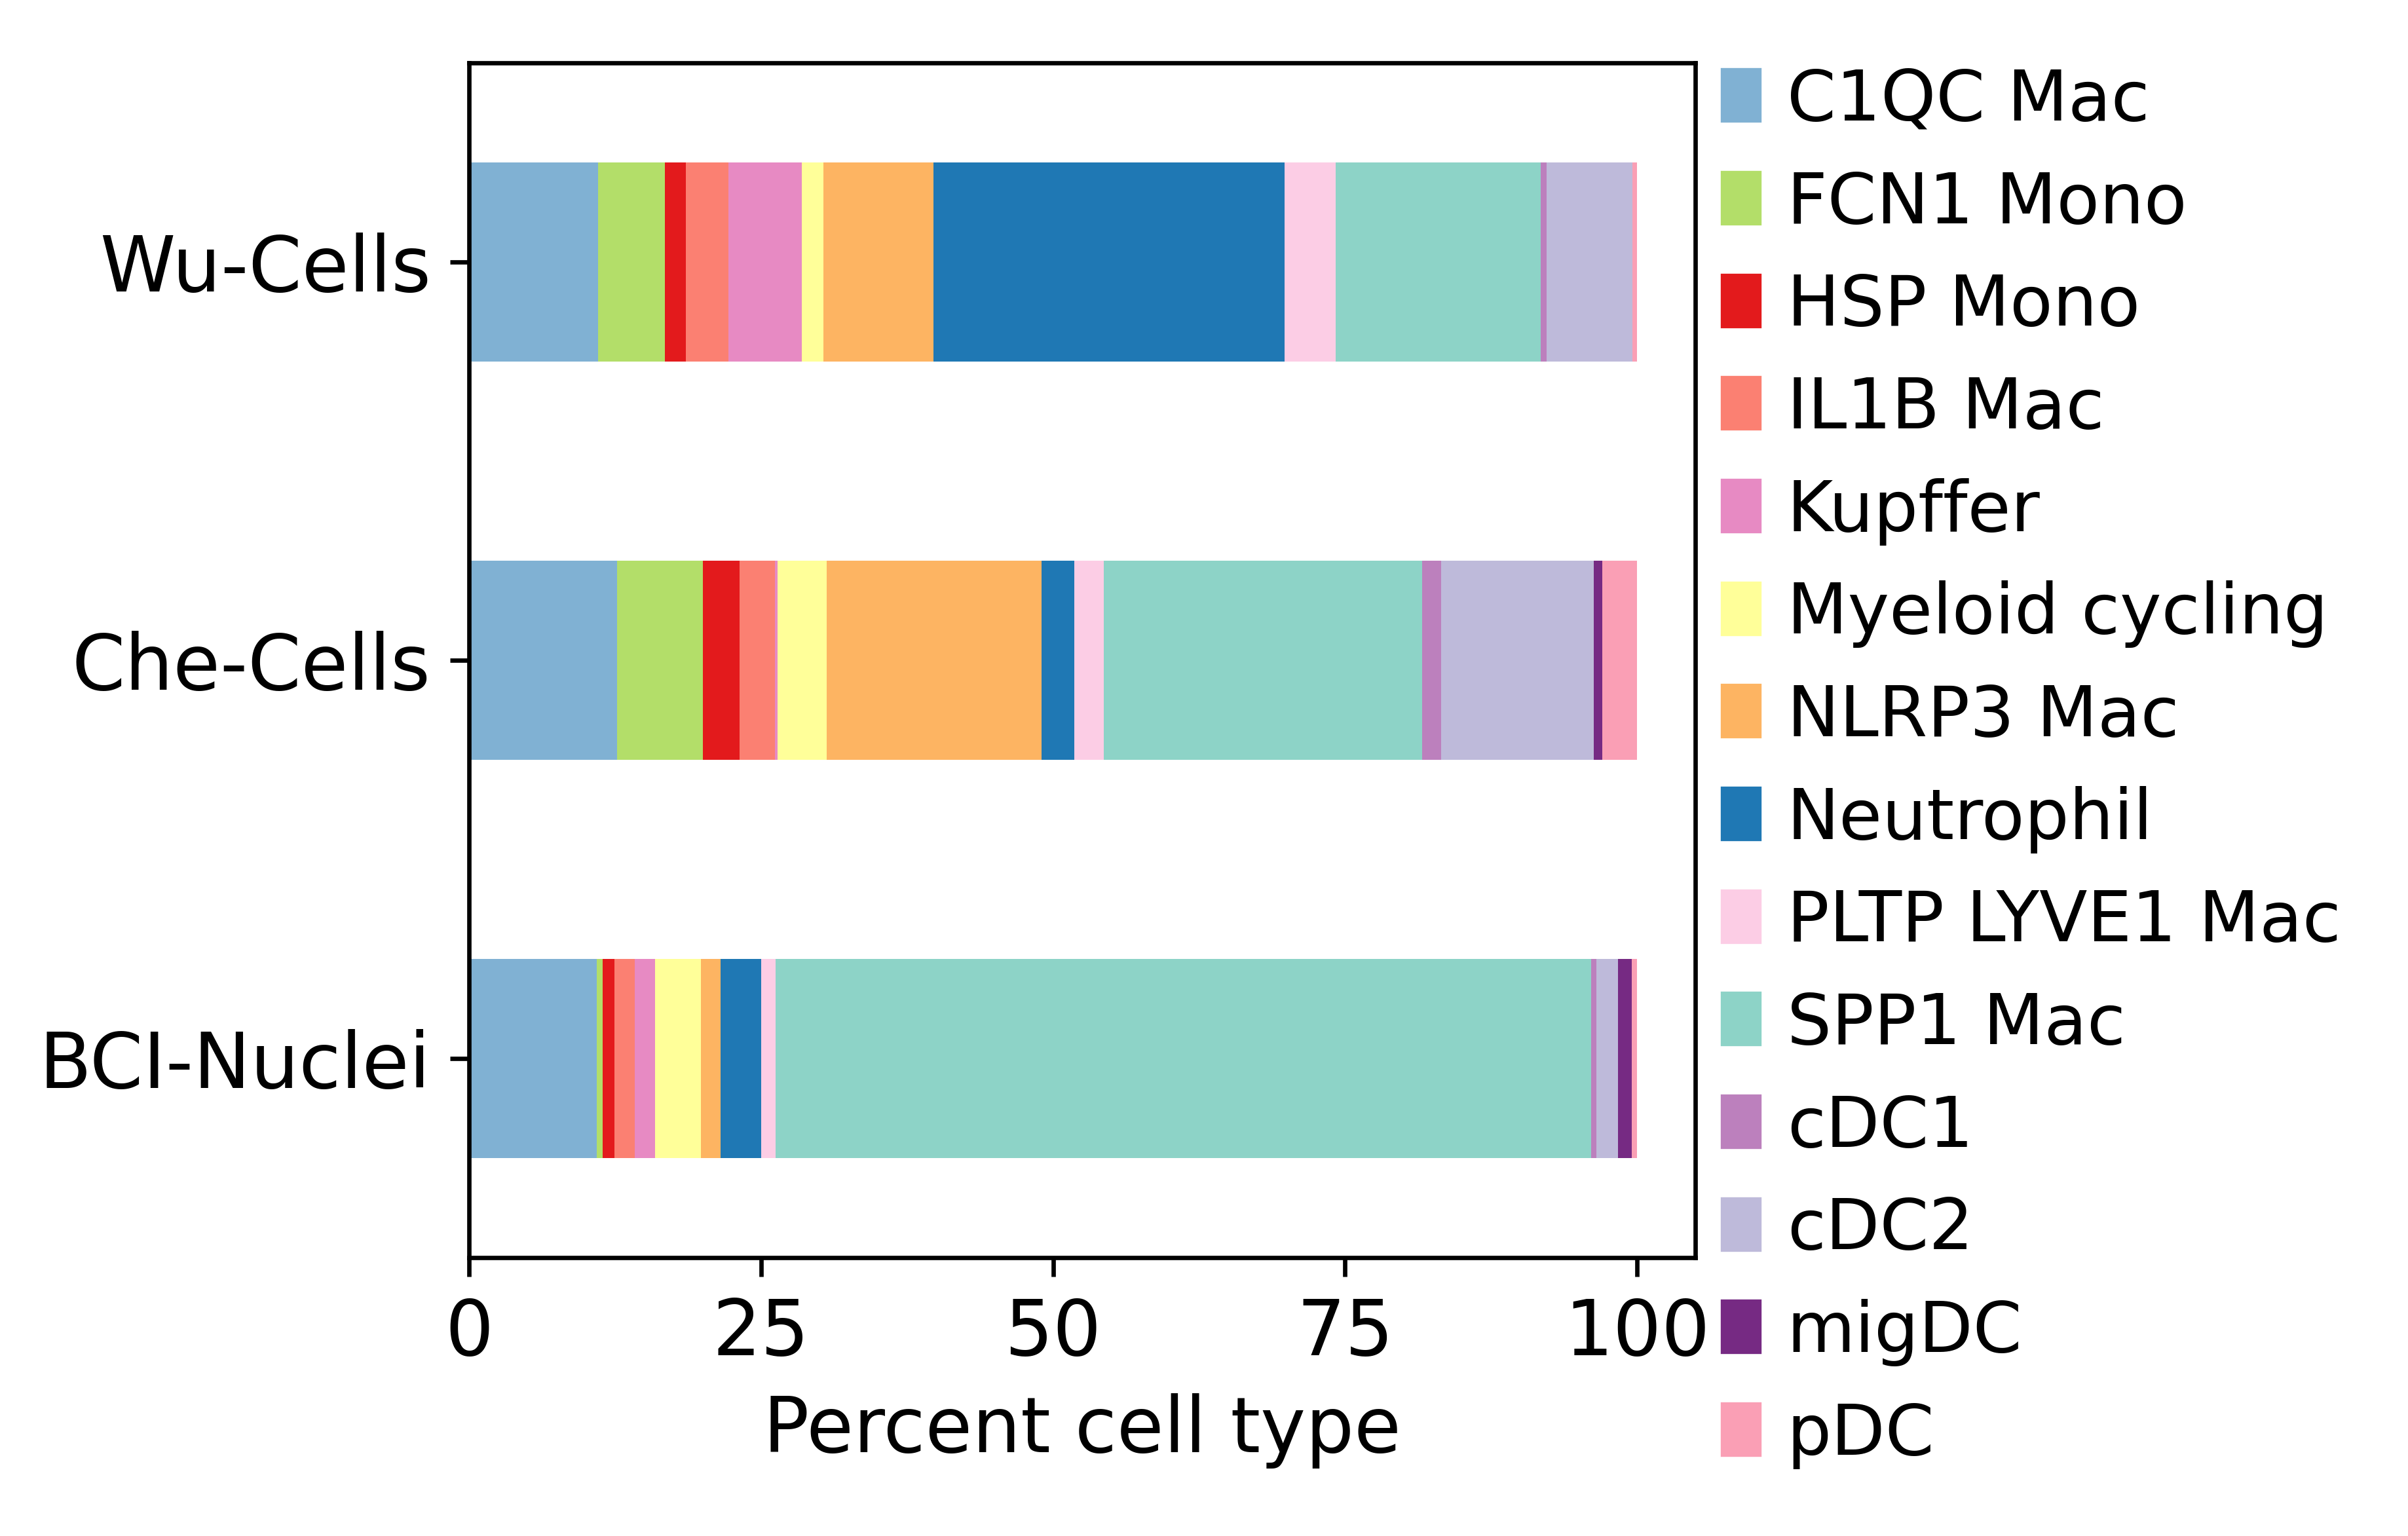

In [7]:
from collections import OrderedDict

color_dict = OrderedDict(
    zip(
        adata.obs["Annotation_scVI_detailed"].cat.categories.values.tolist(),
        adata.uns["Annotation_scVI_detailed_colors"],
    )
)

proportion_cells_patient(
    adata.obs,
    groupby_labels=["cell_source", "Annotation_scVI_detailed"],
    xlabel="Percent cell type",
    ylabel="",
    colors=color_dict,
    bbox_to_anchor=(1,1.02),
    figname="barplot_annotation_across_cell_source.pdf",
)